## Global Graph Analysis ##

### Component Analysis & Overall Structure ### 

In [ ]:
import networkx as nx
from LLM_Graph.analysis_tool import *


In [2]:
G = nx.read_graphml("final_mapped_cleaned_graph.graphml")

In [11]:
components = list(nx.weakly_connected_components(G))
print(f"Number of weakly connected components: {len(components)}")
print([len(c) for c in components])  # Size of each componen
print("\n")
print("Nodes:", G.number_of_nodes())
print("Edges:", G.number_of_edges())
print("Average degree:", sum(dict(G.degree()).values()) / G.number_of_nodes())

Number of weakly connected components: 3
[116231, 11, 10]


Nodes: 116252
Edges: 259812
Average degree: 4.469806971062863


### Centrality Measures ###

Loading GraphML...
Converting to cuGraph...
Computing Betweenness Centrality...

Betweenness Centrality Scores:


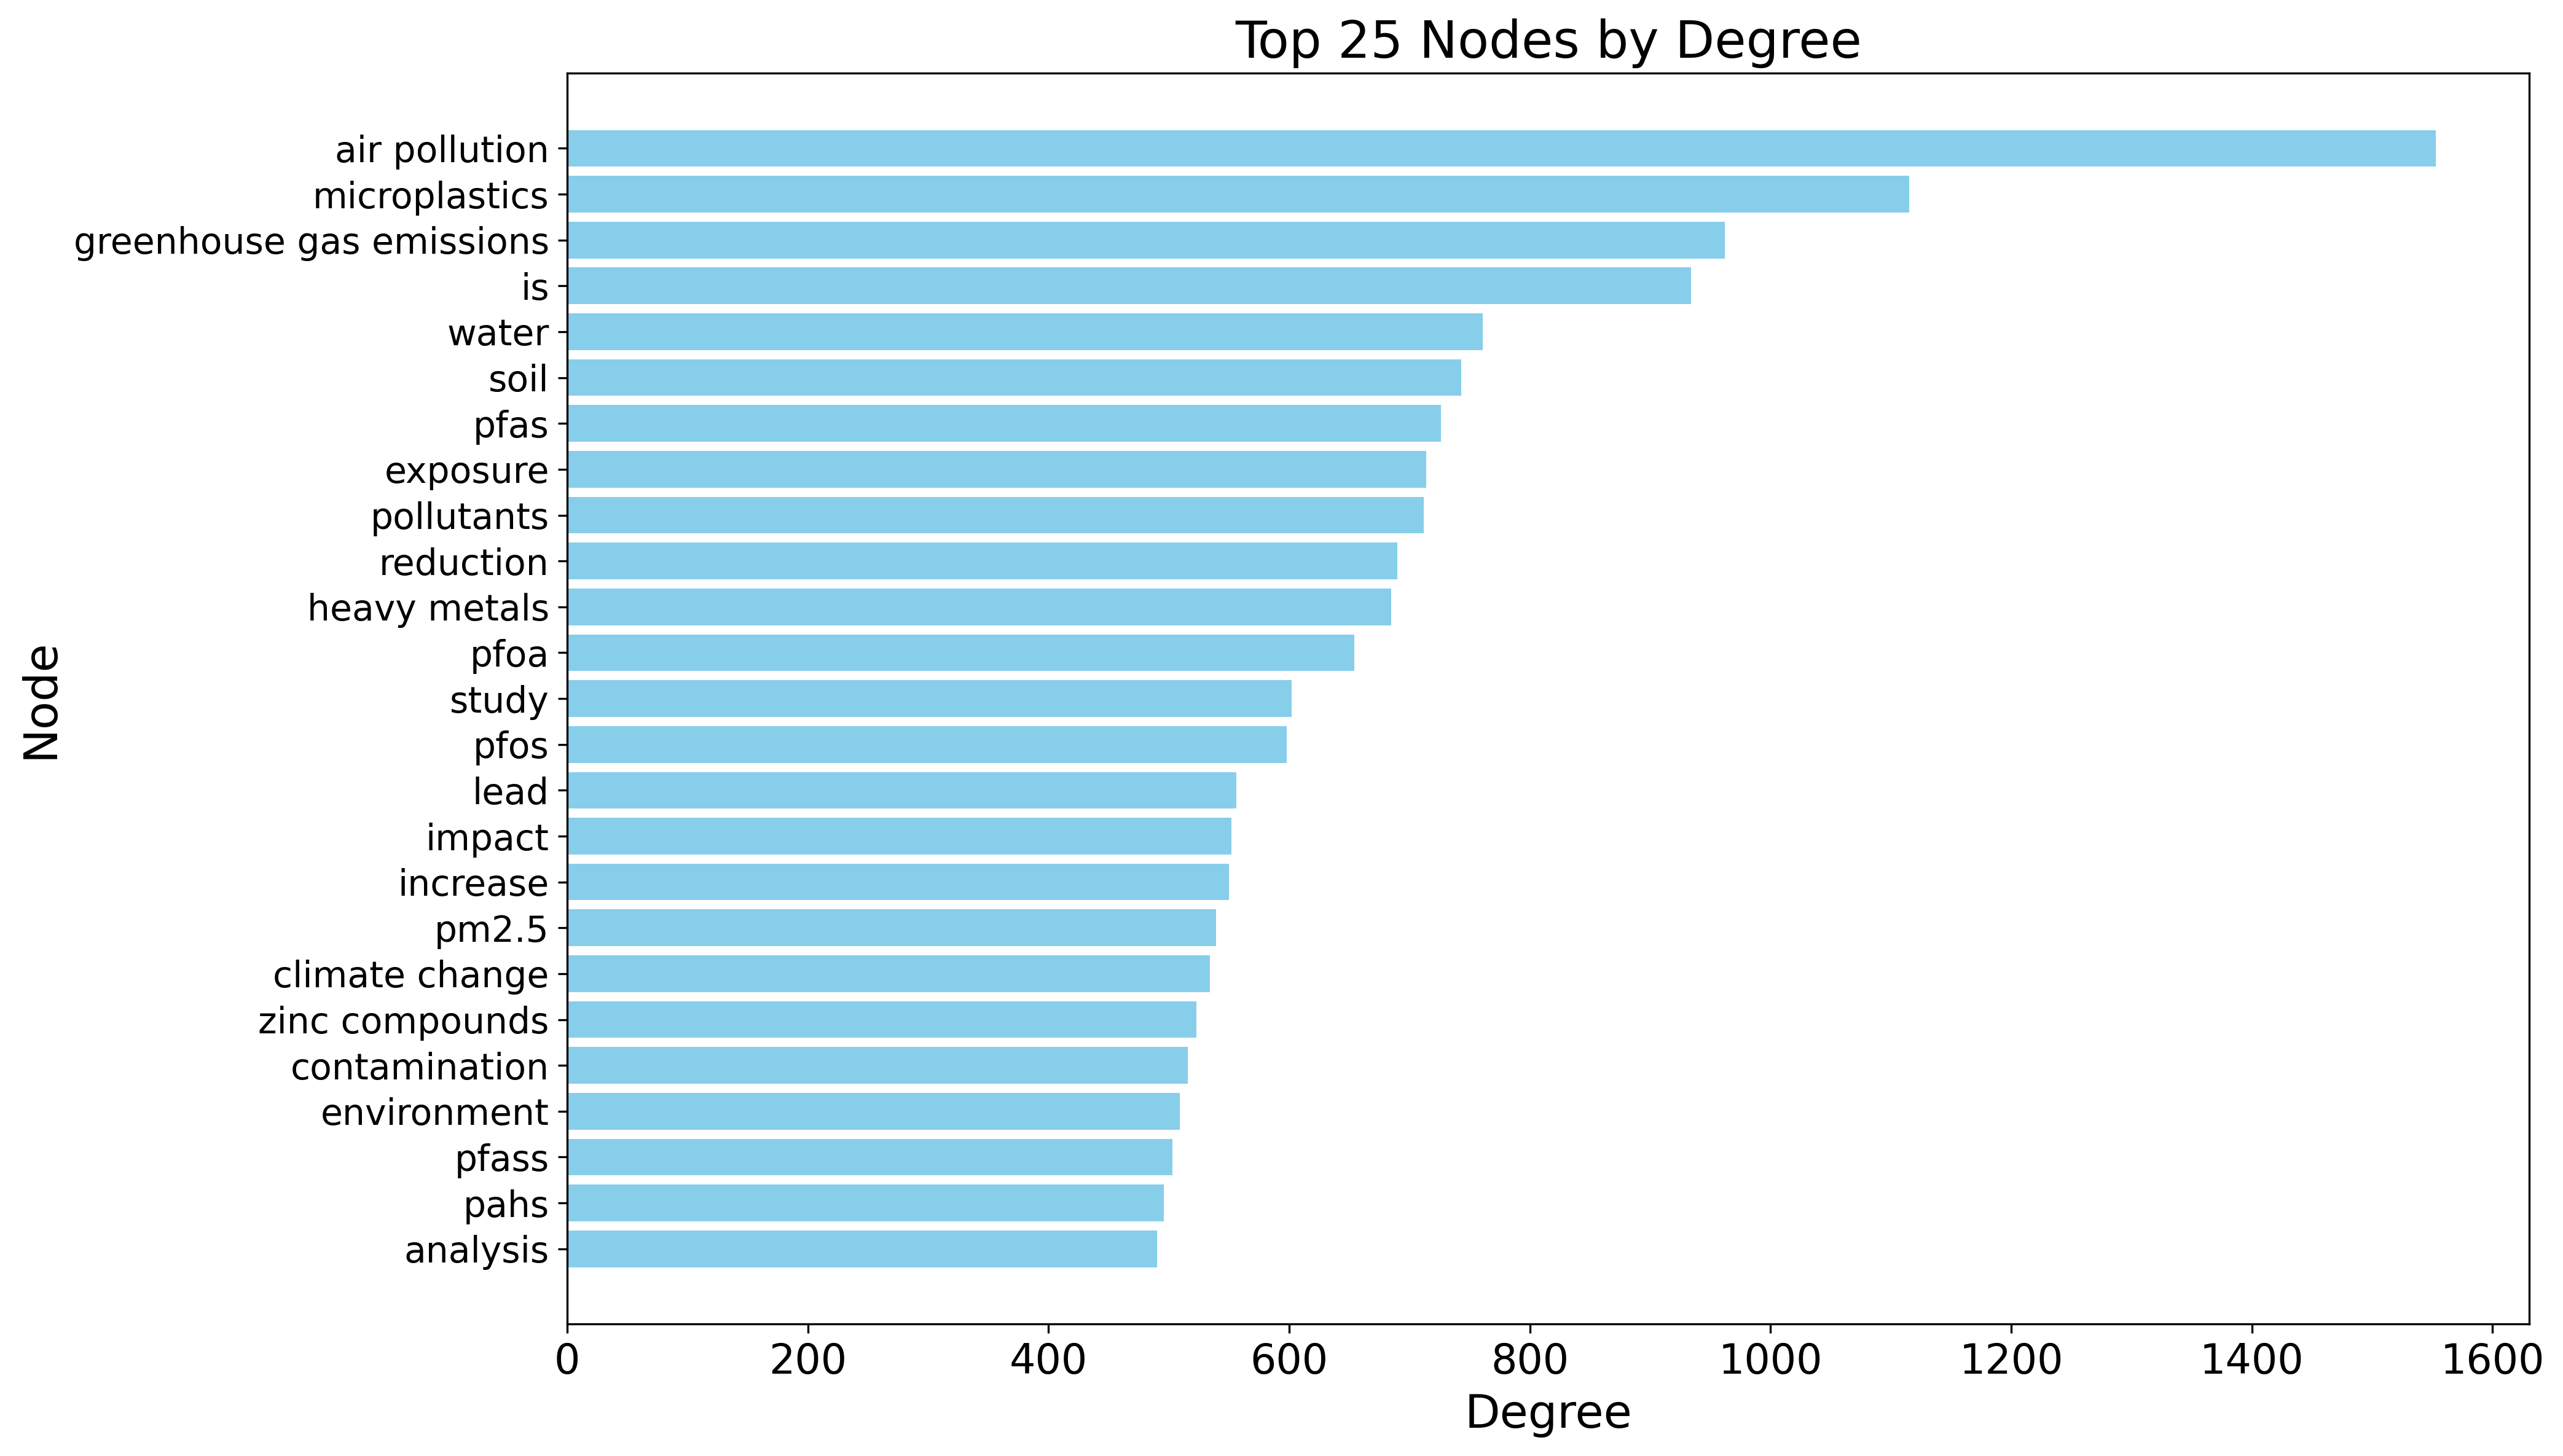

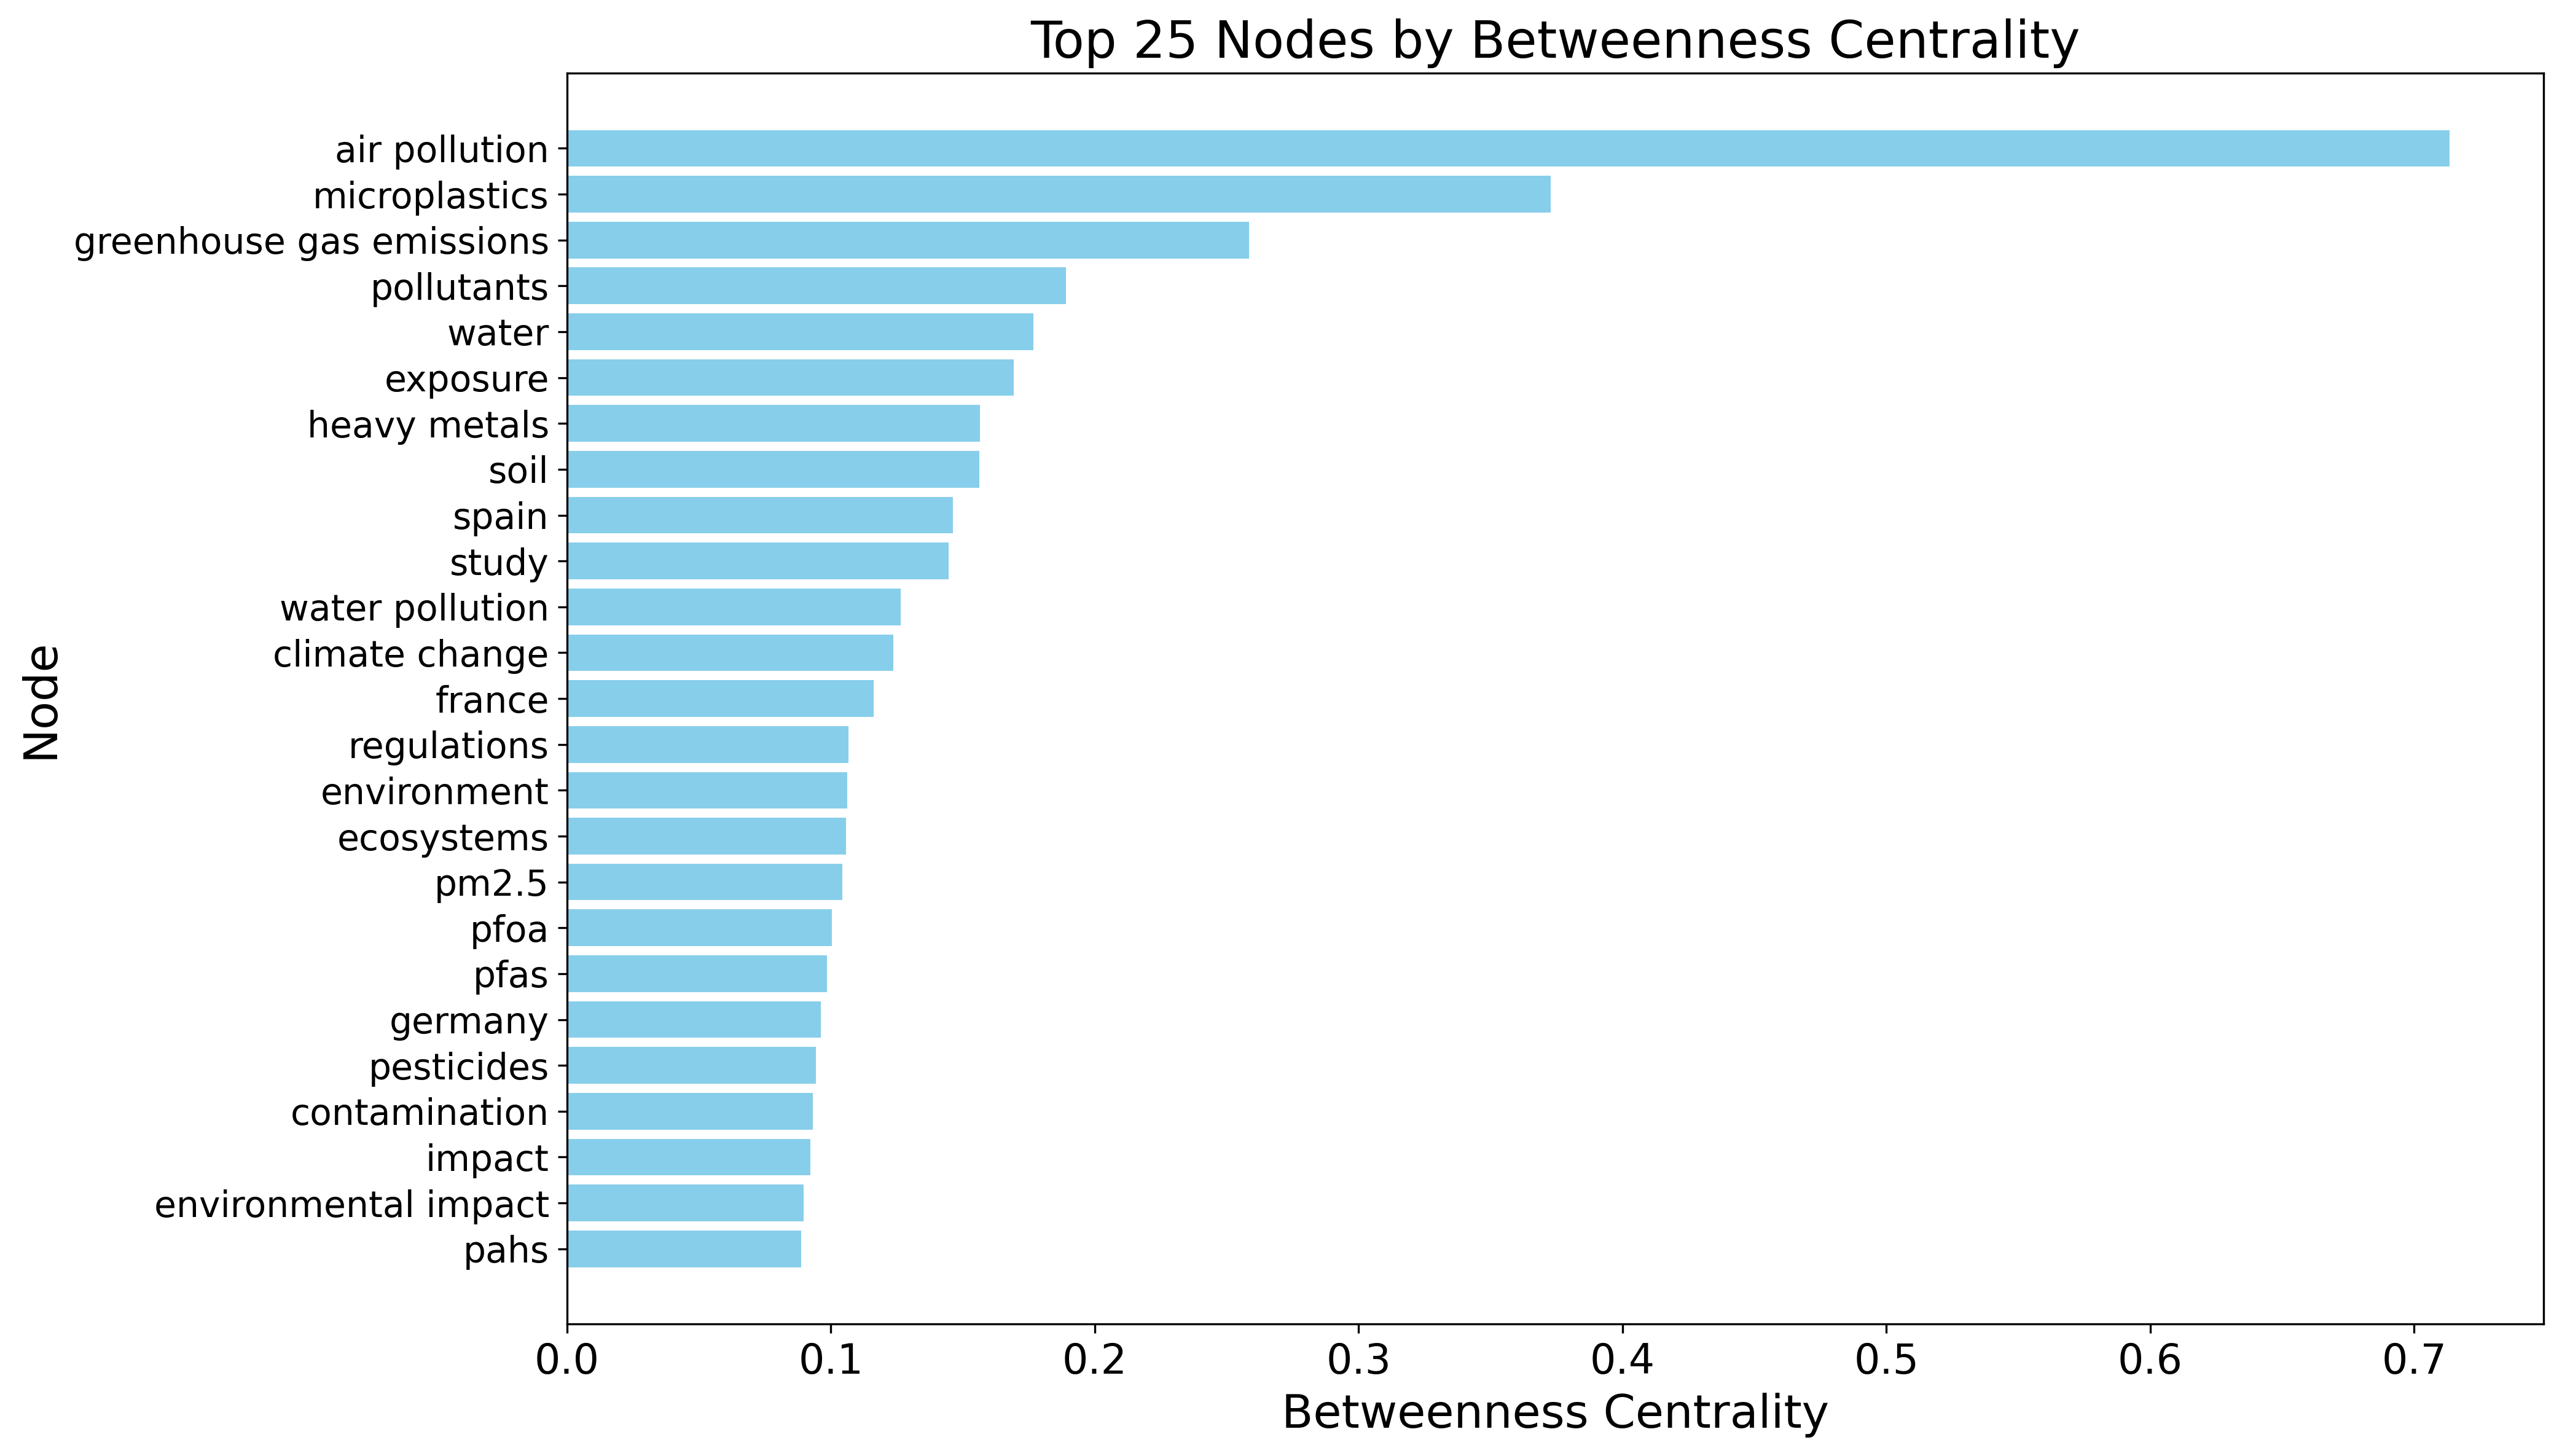

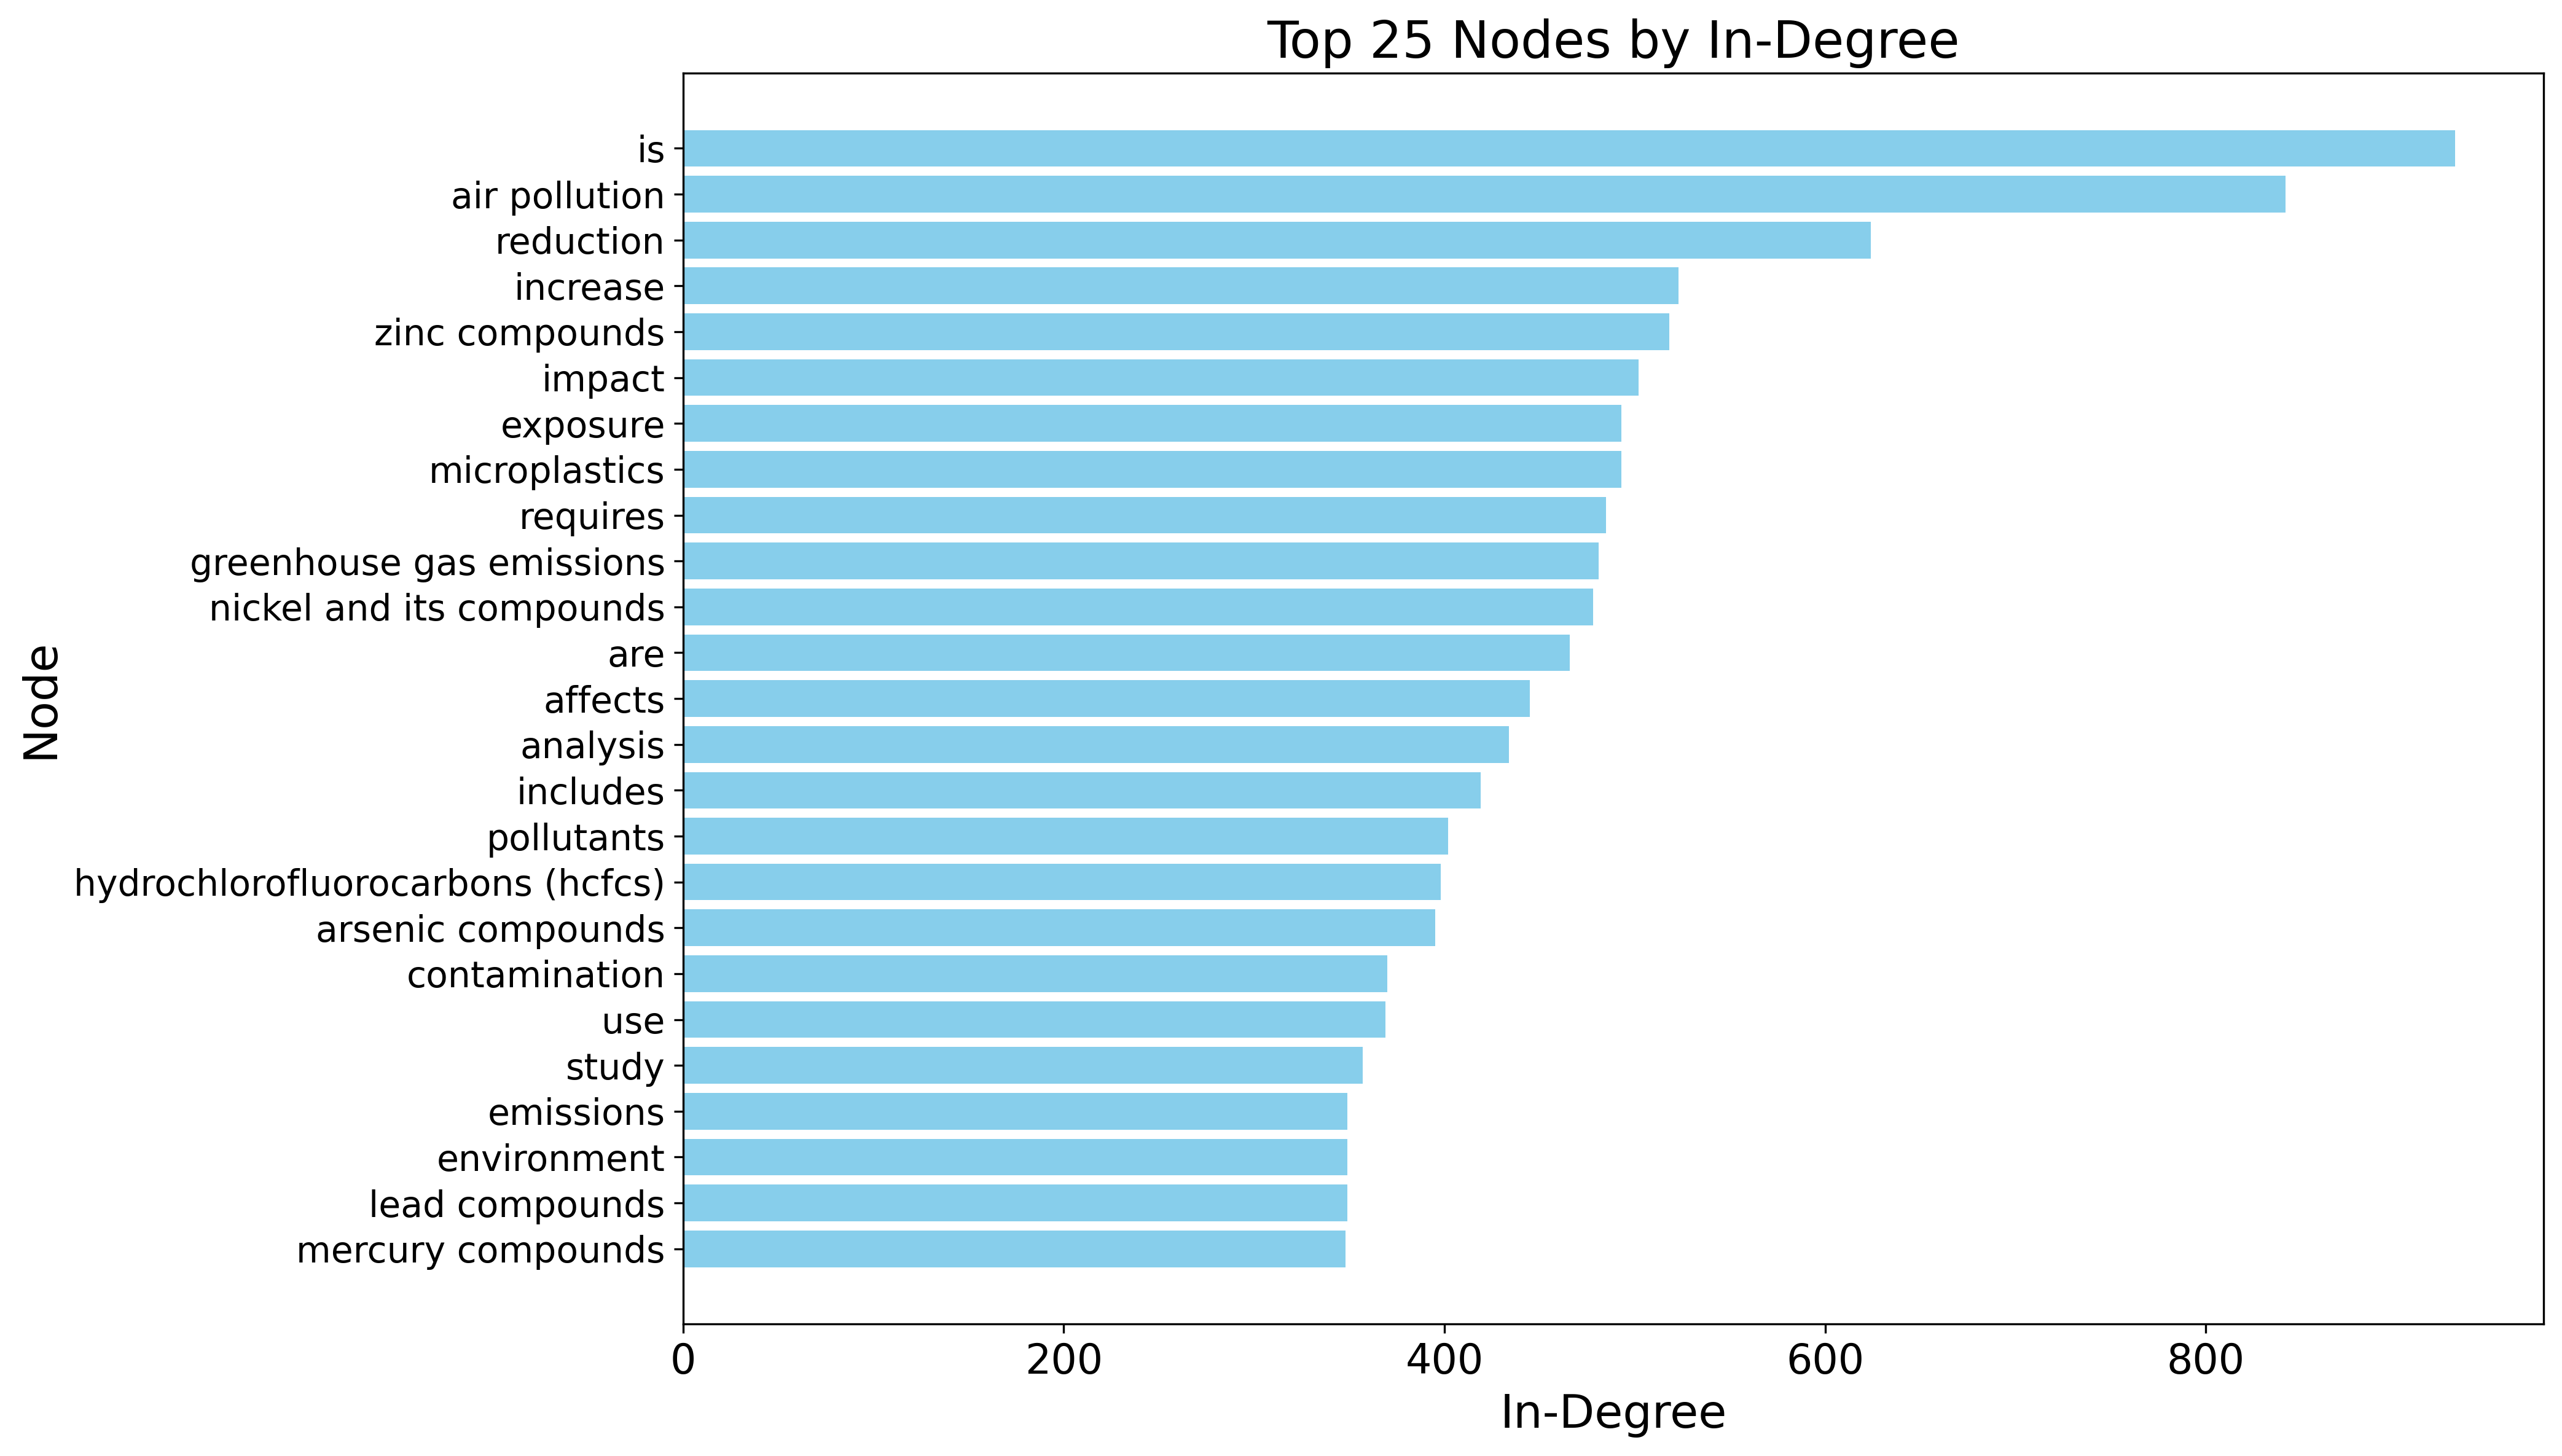

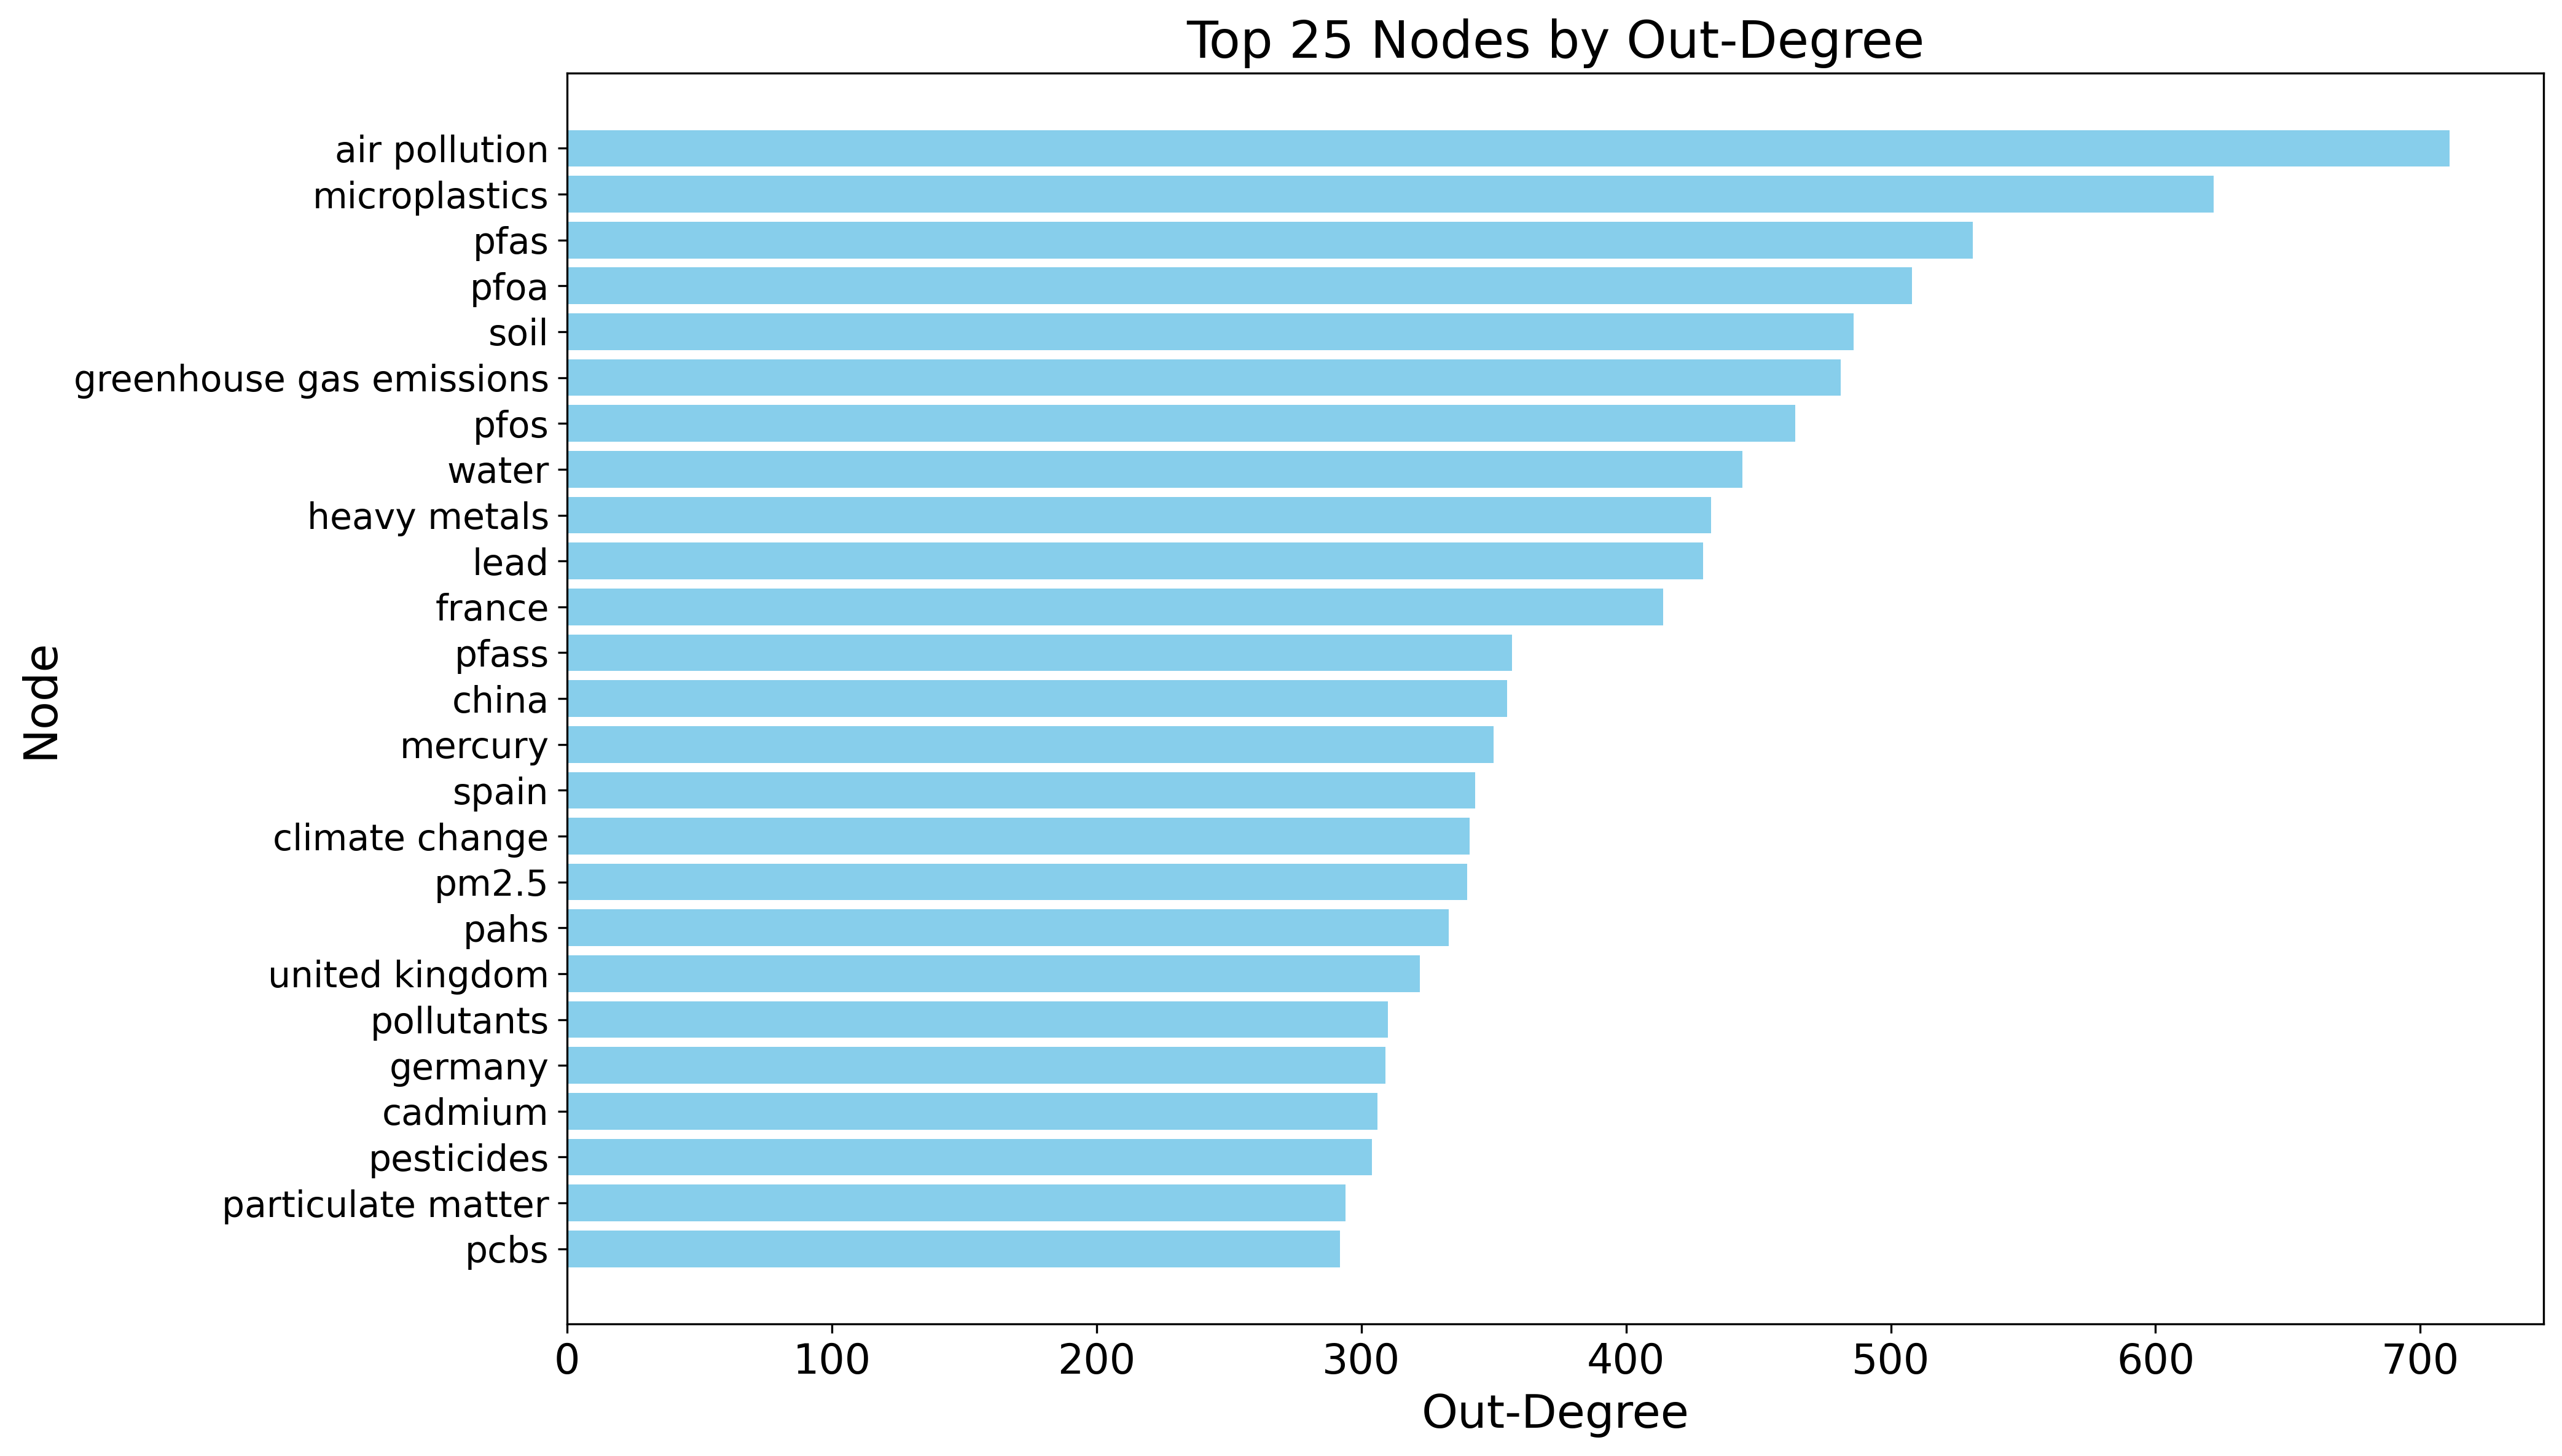

In [12]:
betweenness_score = betweenness_centrality(G)
print("\nBetweenness Centrality Scores:")
centrality_plots(G, betweenness_score, num = 25, directed = True)

### Scale-Free Networks ###

Calculating best minimal value for power law fit
Alpha (γ): 2.1561012865394495
xmin: 9.0
Loglikelihood ratio: -23.60482809203439, p-value: 7.725520580126893e-06


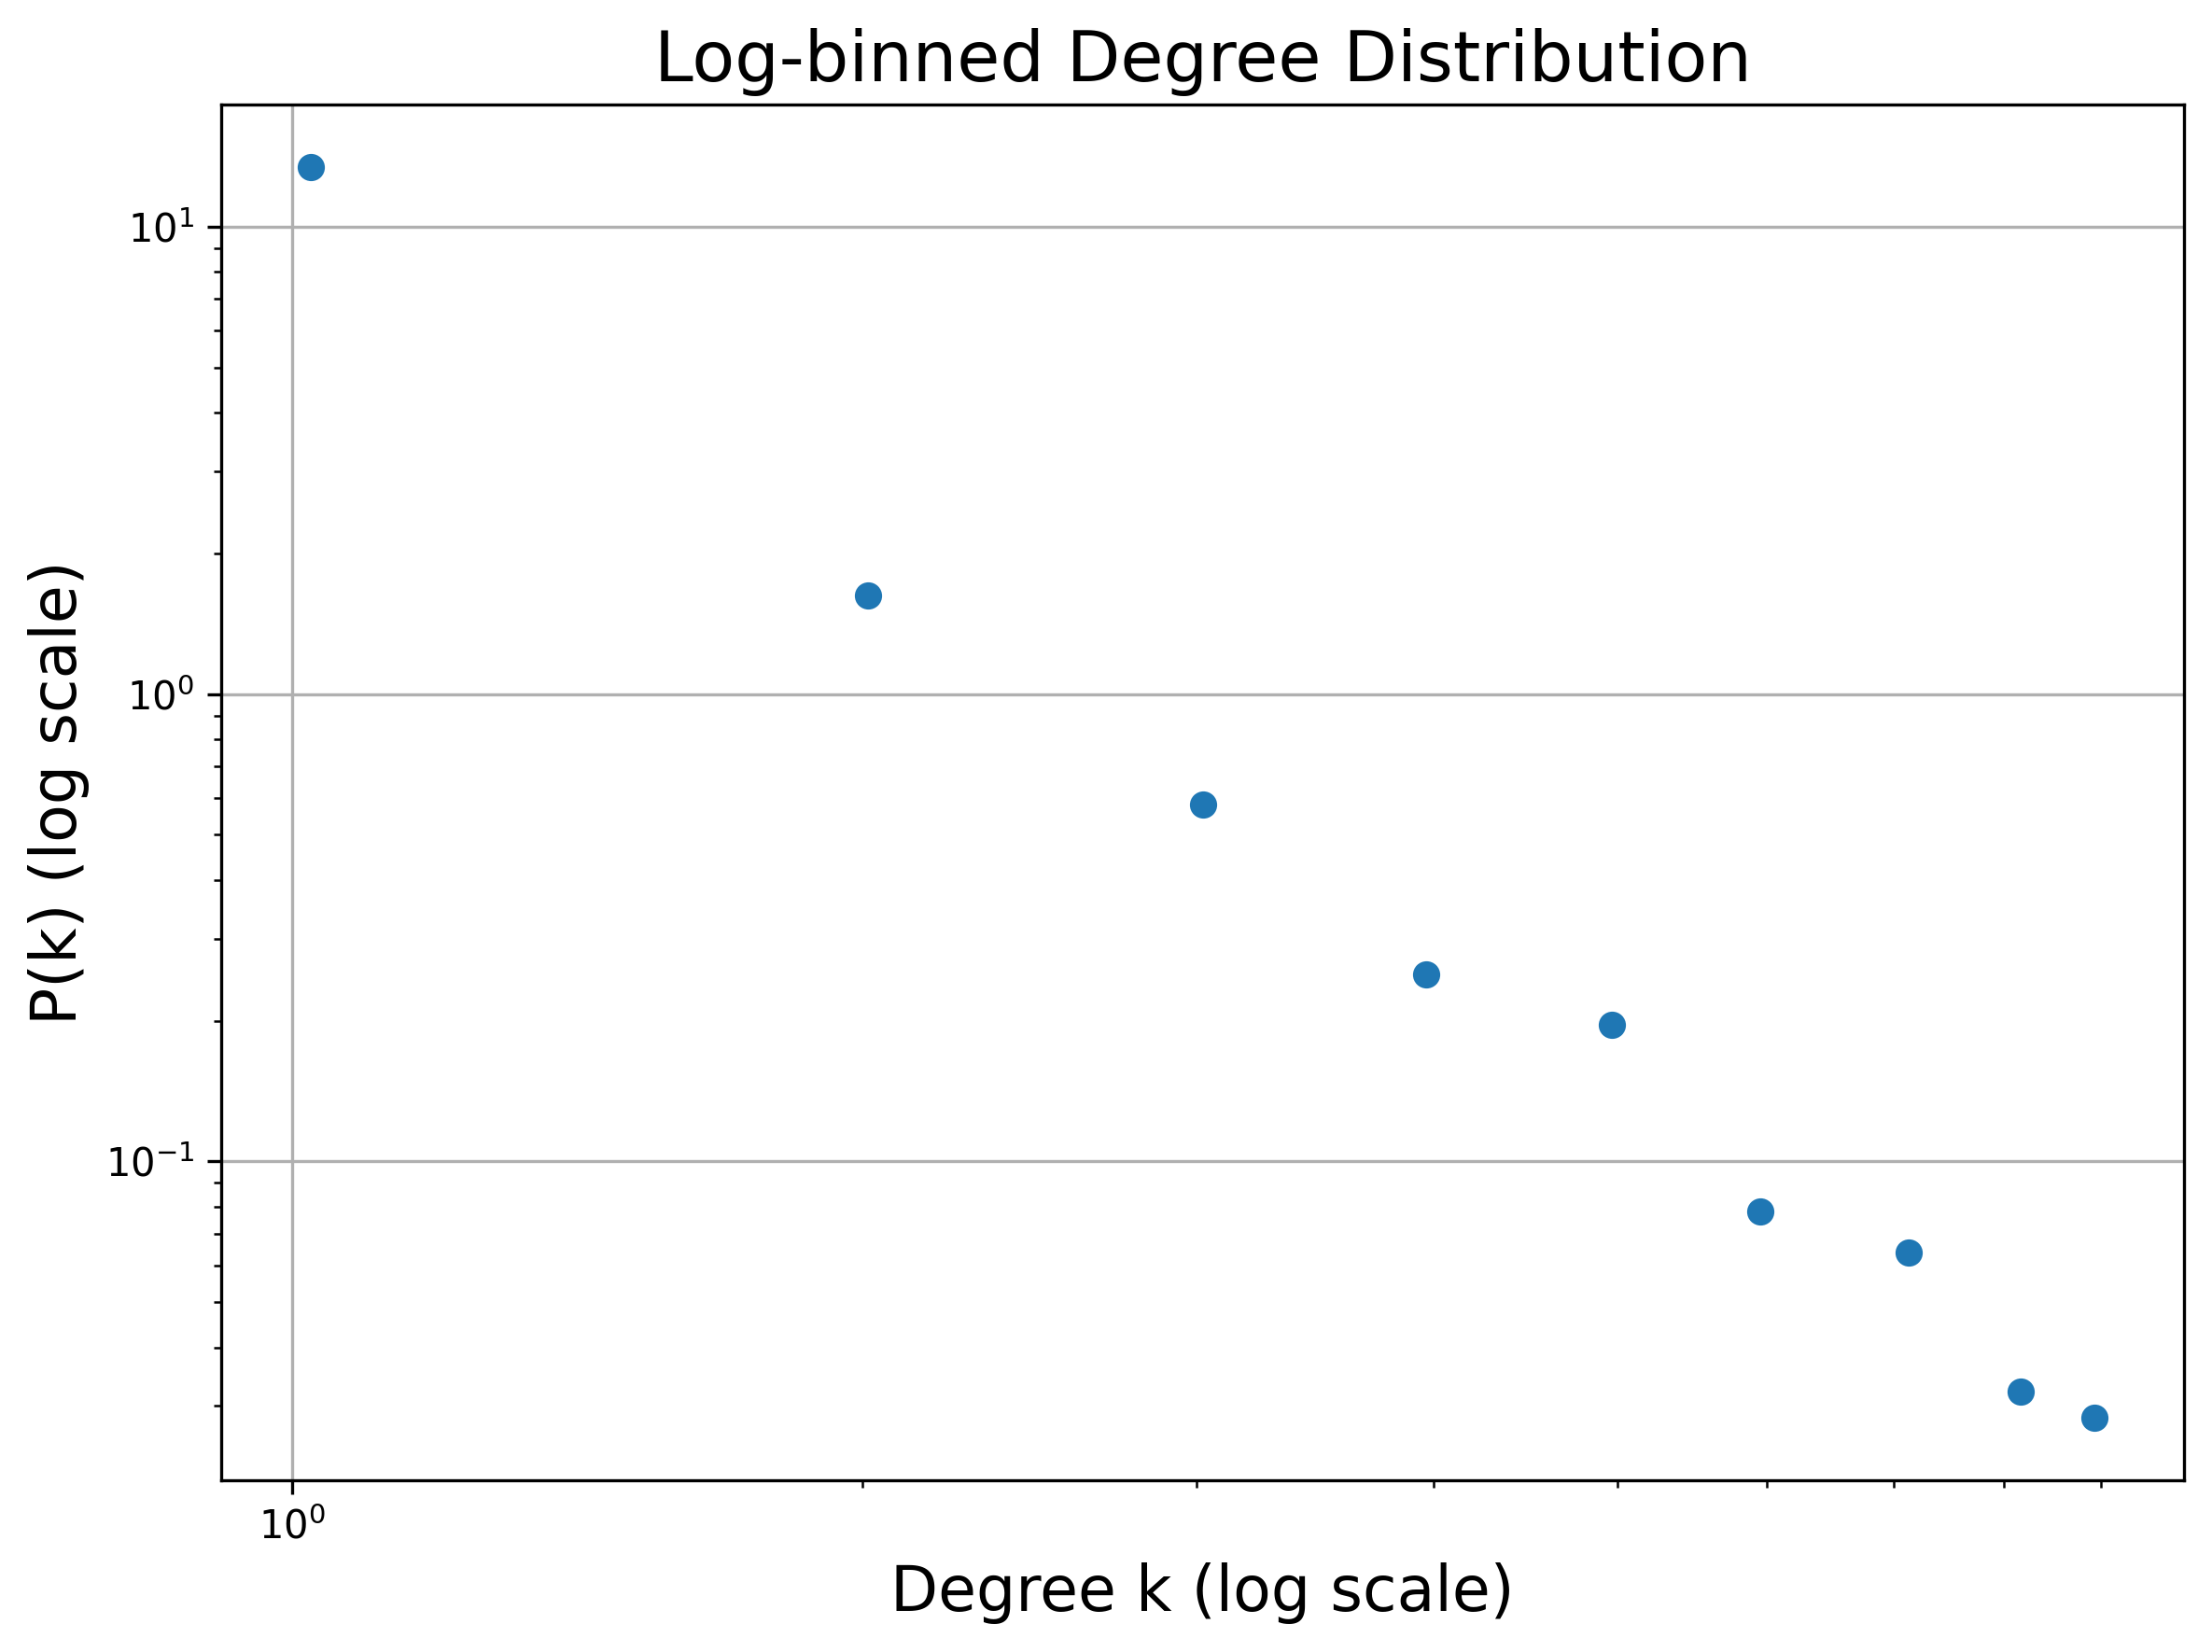

In [3]:
plot_log_binned_degree_distribution(G, logbase=2)

### Subgraph for the Main Concept - Air Pollution ###
Generated by the code below. The color shows each community based on the modular community detection algorithm and the size of the text shows the degree of each node on Gephi.


![My Local Image](./image/air_pollution_subgraph.png)


In [4]:
subgraph_extraction(G, "air_pollution", method="1hop", similar_to=True, graphml=True)

air_pollution_1hop_subgraph.html
Interactive graph saved to: air_pollution_1hop_subgraph.html
Subgraph saved to: air_pollution_1hop_subgraph.graphml


### Personalised PageRank for Each Pollutant ###



In [3]:
results = ppr_pollutants(G)

In [8]:
results['zinc compounds']

[('olfactory dysfunction', 0.054130902475368566),
 ('directive 2010/75/eu', 0.054093502055119154),
 ('olfactory system', 0.054084498445171214),
 ('freshwater ecotoxicity', 0.054072540039690024),
 ('harm', 0.01172463129951341),
 ('odorous compounds', 0.011638412827867038),
 ('involved', 0.011636480028915),
 ('desensitization', 0.011629115066201547),
 ('metals', 0.009428553519954566),
 ('minerals', 0.00937374424875254)]

### Personalised PageRank for Each Country ###

In [9]:
results = ppr_country(G)

In [10]:
results["netherlands"]

[('non-co2 production', 0.19264893173629313),
 ('carbon dioxide', 0.12988324806494117),
 ('include', 0.08012900280160394),
 ('chloride', 0.002532124036021824),
 ('air pollution', 0.0016799198080337783),
 ('greenhouse gas emissions', 0.0015596634081582433),
 ('methane', 0.0015296348730773044),
 ('hydrogen', 0.0014479373924079612),
 ('increase', 0.0013719912371344721),
 ('climate change', 0.0013336829702103432)]

### Community Detection ###
Genereated by the code below for community detaction using Laiden method.
![My Local Image](./image/community_statistics_overview.png)

![My Local Image](./image/top_nodes_by_degree_combined.png)

In [ ]:
describe_communities_with_plots_complex(G)


### Competency Question Answer ###

### Question1 Which EU directives specifically target the reduction of nitrogen oxides (NOx) in air pollution control across Europe? ###

In [3]:
res=generate_response(
	keyword_1="eu directive, eu regulation",
	keyword_2="nitrogen oxides, nitrogen dioxide",
	N_limit=9999,  # The limit for keywords, triplets, etc.
	instruction='Find a specific eu directive or regulation that affects nitrogen oxide emissions directly and indirectly. Provide and Analyze the explicitly relationship between nitrogen oxide and the directive/regulation.',
 	temperature=0.1, 
  	prepend='''You are given a set of information from a graph that describes the relationship 
			   on environmental pollution. You analyze these logically 
			   through reasoning.\n\n''', 
    visualize_paths_as_graph=True,  # Whether to visualize paths as a graph
	display_graph=True, 
)

0nth best fitting node for 'eu directive, eu regulation': 'eu directives' with similarity: 0.8833313584327698
0nth best fitting node for 'nitrogen oxides, nitrogen dioxide': 'nitrogen oxides' with similarity: 0.8889452219009399
./GRAPHDATA_OUTPUT//shortest_path_2hops_eu directives_nitrogen oxides.html
HTML visualization: ./GRAPHDATA_OUTPUT//shortest_path_2hops_eu directives_nitrogen oxides.html
GraphML file: ./GRAPHDATA_OUTPUT//shortestpath_2hops_eu directives_nitrogen oxides.graphml
You are given a set of information from a graph that describes the relationship 
			   on environmental pollution. You analyze these logically 
			   through reasoning.

### Consider this list of nodes and relations in a knowledge graph:

Format: node_1, relationship, node_2

The data is:

corrosion, can lead to, issues
corrosion, risk, risks
corrosion, consider, considers
mobile emission sources, are susceptible to, environmental factors
mobile emission sources, substantial contribution, substantial contr

**Response:** Certainly! Let's analyze the knowledge graph for explicit relationships between **EU directives/regulations** and **nitrogen oxide (NOx) emissions**.

---

## 1. **Direct Relationships**

### a. **EU Directives and Nitrogen Oxides**

From the data:

- **no2, play a crucial role in reducing emissions, eu directives**
- **nitrogen oxides, have emission limits under, ied & euro 5/6 vehicle standards**
- **nitrogen oxides, have emission limits under, industrial emissions directive (ied) and euro 5/6 vehicle standards**
- **nitrogen oxides, emissions regulated for vehicles by, eu euro 5/6 regulation (e.g., 80 mg/km for diesel cars)**
- **nitrogen oxides, emissions regulated for ships by, marpol annex vi (tier i, ii, iii limits)**
- **eu directives, set without specifying hourly or daily limits, emission reduction targets**
- **eu directives, result in, best available techniques**
- **eu directives, result in, seveso ii**
- **eu directives, result in, 96/61/ec**

### b. **Emission Reduction Targets**

- **emission reduction targets, require, environmental protection**
- **so2, applies to, emission reduction targets**
- **no2, be reduce, reduction**
- **non-methane volatile organic compounds (nmvocs), applies to, emission reduction targets**
- **nitrogen oxides, applies to, emission reduction targets**

---

## 2. **Specific EU Directives/Regulations Identified**

### a. **Industrial Emissions Directive (IED)**
- **nitrogen oxides, have emission limits under, industrial emissions directive (ied) and euro 5/6 vehicle standards**

**Analysis:**  
The **Industrial Emissions Directive (IED)** (Directive 2010/75/EU) is the main EU policy regulating pollutant emissions from industrial installations. It sets **emission limit values (ELVs)** for nitrogen oxides (NOx) from large combustion plants, waste incineration, and other industrial sources.  
- **Direct effect:** The IED mandates maximum allowable NOx emissions for specific sectors, requiring industries to use Best Available Techniques (BAT) to minimize emissions.
- **Indirect effect:** By requiring BAT and periodic review, it indirectly drives technological innovation and stricter controls, reducing NOx emissions over time.

### b. **Euro 5/6 Vehicle Standards (EU Regulation)**
- **nitrogen oxides, have emission limits under, ied & euro 5/6 vehicle standards**
- **nitrogen oxides, emissions regulated for vehicles by, eu euro 5/6 regulation (e.g., 80 mg/km for diesel cars)**

**Analysis:**  
The **Euro 5 and Euro 6 regulations** (Regulation (EC) No 715/2007 and amendments) set strict NOx emission limits for new vehicles sold in the EU.
- **Direct effect:** These regulations specify maximum NOx emissions per kilometer for cars and light commercial vehicles (e.g., 80 mg/km for diesel cars under Euro 6).
- **Indirect effect:** They drive automotive manufacturers to develop cleaner engines, after-treatment systems (like SCR and EGR), and promote the adoption of electric vehicles.

### c. **Emission Reduction Targets (Directive 2001/81/EC - National Emission Ceilings Directive, NEC)**
- **eu directives, set without specifying hourly or daily limits, emission reduction targets**
- **nitrogen oxides, applies to, emission reduction targets**

**Analysis:**  
The **National Emission Ceilings (NEC) Directive** (Directive 2001/81/EC, updated by Directive (EU) 2016/2284) sets national caps for annual emissions of NOx (and other pollutants) for each EU member state.
- **Direct effect:** Each country must ensure its total annual NOx emissions do not exceed the assigned ceiling.
- **Indirect effect:** This compels member states to implement a mix of policies (across transport, industry, energy, agriculture) to achieve compliance, thus reducing NOx emissions from multiple sectors.

---

## 3. **Explicit Relationships in the Knowledge Graph**

### **Summary Table**

| EU Directive/Regulation         | Relationship to NOx Emissions         | Direct/Indirect | Knowledge Graph Evidence |
|---------------------------------|---------------------------------------|-----------------|-------------------------|
| Industrial Emissions Directive (IED) | Sets emission limits for NOx from industry | Direct          | "nitrogen oxides, have emission limits under, industrial emissions directive (ied) and euro 5/6 vehicle standards" |
| Euro 5/6 Vehicle Standards      | Sets NOx limits for vehicles          | Direct          | "nitrogen oxides, emissions regulated for vehicles by, eu euro 5/6 regulation (e.g., 80 mg/km for diesel cars)" |
| National Emission Ceilings (NEC) Directive | Sets national NOx emission caps           | Direct/Indirect | "eu directives, set without specifying hourly or daily limits, emission reduction targets" and "nitrogen oxides, applies to, emission reduction targets" |

---

## 4. **Logical Analysis**

- **IED** directly regulates NOx emissions from industrial sources by setting ELVs and requiring BAT.
- **Euro 5/6** directly regulates NOx emissions from vehicles by setting per-vehicle emission limits.
- **NEC Directive** sets overall national NOx emission ceilings, indirectly affecting all sectors by requiring aggregate reductions.
- All these directives/regulations are **explicitly linked** to NOx in the knowledge graph via "have emission limits under", "applies to", and "regulated for vehicles by" relationships.

---

## 5. **Conclusion**

**The most explicit and direct EU directive affecting nitrogen oxide emissions is the Industrial Emissions Directive (IED), which sets emission limits for NOx from industrial sources. The Euro 5/6 vehicle standards (an EU regulation) directly set NOx limits for vehicles. The National Emission Ceilings (NEC) Directive sets national caps for NOx emissions, affecting all sectors.**

**These relationships are explicitly represented in the knowledge graph, showing both direct (sector-specific limits) and indirect (national caps, technology requirements) regulatory impacts on nitrogen oxide emissions.**

The interactive subgraph used to answer this question is generated using Pyviz and saved as "directive_nox.html".

In [4]:
sub_G = nx.read_graphml("GRAPHDATA_OUTPUT/shortestpath_2hops_eu directives_nitrogen oxides.graphml")
visualize_subgraph_pyvis(sub_G, "directive_nox.html")

directive_nox.html
Interactive graph saved to: output/directive_nox.html


### Question2 How does the Water Framework Directive aim to reduce nitrate pollution in European groundwater? ###

In [5]:
res=generate_response(
    keyword_1="water framework directive",
	keyword_2="nitrate",
	N_limit=9999,
	instruction = "How does the Water Framework Directive aim to reduce nitrate pollution in European groundwater? Trace the policy-pollutant link.",
	temperature=0.1, 
	prepend='''You are given a set of information from a graph that describes the relationship 
			   on environmental pollution. You analyze these logically 
			   through reasoning.\n\n''',
	visualize_paths_as_graph=False,  
	display_graph=False)

0nth best fitting node for 'water framework directive': 'water framework directive' with similarity: 0.9770115613937378
0nth best fitting node for 'nitrate': 'nitrate' with similarity: 0.9706765413284302
./GRAPHDATA_OUTPUT//shortest_path_2hops_water framework directive_nitrate.html
HTML visualization: ./GRAPHDATA_OUTPUT//shortest_path_2hops_water framework directive_nitrate.html
GraphML file: ./GRAPHDATA_OUTPUT//shortestpath_2hops_water framework directive_nitrate.graphml
You are given a set of information from a graph that describes the relationship 
			   on environmental pollution. You analyze these logically 
			   through reasoning.

### Consider this list of nodes and relations in a knowledge graph:

Format: node_1, relationship, node_2

The data is:

corrosion, can lead to, issues
corrosion, risk, risks
corrosion, consider, considers
sewage, results in, introduction
sewage, encounter, marine ecosystems
sewage, elimination is crucial in, source
sewage, involves, reduction
sewage,

**Response:** To answer how the **Water Framework Directive (WFD)** aims to reduce **nitrate pollution** in European groundwater, let's logically trace the policy-pollutant link using the knowledge graph data:

---

### 1. **Policy Node: Water Framework Directive (WFD)**
- **WFD** is a central piece of EU water policy, aiming to achieve "good chemical and ecological status" for all EU waters, including groundwater.

#### Relevant relations:
- **water framework directive, aims to achieve, good chemical status**
- **water framework directive, aims to achieve, good environmental status**
- **water framework directive, sets standards for chemical and quantitative aspects of, groundwater**
- **water framework directive, regulates water pollutant, nitrate**
- **water framework directive, identifies risk pollutant for, aquatic environments**
- **water framework directive, aims to protect and improve the quality of, europe's inland and coastal waters**
- **water framework directive, provides regulatory framework for, regulatory frameworks**
- **water framework directive, ensures, good water quality**

---

### 2. **Pollutant Node: Nitrate**
- **Nitrate** is a key pollutant in groundwater, mainly from agricultural runoff (fertilizers, manure).

#### Relevant relations:
- **nitrate, is, pollutant**
- **nitrate, poses risk, groundwater**
- **nitrate, leach into, leach into**
- **nitrate, is below, maximum allowable limits** (desired outcome)
- **nitrate, includes, nutrients**
- **nitrate, can negatively impact, pregnancy outcomes**
- **nitrate, is part of, nitrogen cycle**
- **nitrate, increases, water conductivity**
- **nitrate, is converted into, denitrifying bacteria** (natural attenuation process)

---

### 3. **Policy Mechanism: How WFD Addresses Nitrate Pollution**
- **water framework directive, regulates water pollutant, nitrate**
- **water framework directive, aims to achieve, good chemical status**
- **water framework directive, sets standards for chemical and quantitative aspects of, groundwater**
- **water framework directive, aims to protect and improve the quality of, europe's inland and coastal waters**
- **water framework directive, ensures, good water quality**
- **water framework directive, employs via, effective strategies**
- **water framework directive, provides, regulations**

**Interpretation:**
- The WFD sets **maximum allowable limits** for nitrate in groundwater.
- It requires **monitoring** of nitrate concentrations in groundwater.
- If nitrate exceeds limits, **member states must implement action plans** (e.g., Nitrate Vulnerable Zones, agricultural best practices).
- The WFD mandates **regulatory frameworks** and **effective strategies** to reduce nitrate inputs (e.g., fertilizer management, manure storage, buffer strips).

---

### 4. **Trace the Link: From Policy to Pollutant**
1. **WFD sets legal standards** for nitrate in groundwater (**water framework directive, regulates water pollutant, nitrate**).
2. **Groundwater is monitored** for nitrate concentrations (**water framework directive, ensures, good water quality**).
3. **If nitrate exceeds limits**, member states must **implement measures** to reduce inputs (**water framework directive, employs via, effective strategies**).
4. **Measures target sources** (mainly agriculture: fertilizer/manure application, runoff control).
5. **Goal:** Achieve and maintain **good chemical status** in groundwater (**water framework directive, aims to achieve, good chemical status**).

---

### 5. **Summary Table**

| Step | Node/Relation | Description |
|------|---------------|-------------|
| 1 | water framework directive, regulates water pollutant, nitrate | WFD sets nitrate limits |
| 2 | water framework directive, ensures, good water quality | Requires monitoring |
| 3 | nitrate, poses risk, groundwater | Nitrate is a risk pollutant |
| 4 | water framework directive, employs via, effective strategies | If limits exceeded, action plans required |
| 5 | water framework directive, aims to achieve, good chemical status | Goal: reduce nitrate to safe levels |

---

### **Conclusion (Logical Reasoning):**

**The Water Framework Directive aims to reduce nitrate pollution in European groundwater by:**
- **Setting legal limits** for nitrate concentrations in groundwater.
- **Mandating regular monitoring** of groundwater for nitrate.
- **Requiring member states to implement targeted measures** (especially in agriculture) if nitrate levels exceed limits.
- **Enforcing regulatory frameworks and action plans** to reduce nitrate inputs from sources (mainly agricultural runoff).
- **The ultimate goal is to achieve and maintain "good chemical status"** for groundwater, protecting both environmental and human health.

**This policy-pollutant link is direct, enforceable, and science-based, with monitoring and corrective actions at its core.**

### Question3 What industrial sectors in the Netherlands emit ammonia, and how are these emissions regulated? ###

In [6]:
res=generate_response(
    keyword_1= "netherlands",
	keyword_2= "ammonia",
	N_limit=9999,
	instruction = "What industrial sectors in the Netherlands emit ammonia, and how are these emissions regulated? Explain using graph data.",
	temperature=0.1,
	prepend='''You are given a set of information from a graph that describes the relationship 
			   on environmental pollution. You analyze these logically 
			   through reasoning.\n\n''',
	visualize_paths_as_graph=False,
	display_graph=False)

0nth best fitting node for 'netherlands': 'netherlands' with similarity: 0.9691068530082703
0nth best fitting node for 'ammonia': 'ammonia' with similarity: 0.9748389720916748
./GRAPHDATA_OUTPUT//shortest_path_2hops_netherlands_ammonia.html
HTML visualization: ./GRAPHDATA_OUTPUT//shortest_path_2hops_netherlands_ammonia.html
GraphML file: ./GRAPHDATA_OUTPUT//shortestpath_2hops_netherlands_ammonia.graphml
You are given a set of information from a graph that describes the relationship 
			   on environmental pollution. You analyze these logically 
			   through reasoning.

### Consider this list of nodes and relations in a knowledge graph:

Format: node_1, relationship, node_2

The data is:

netherlands_cement production_2013, emits, mercury compounds
netherlands_synthetic chemical production_2015, emits, ethylene oxides
netherlands_synthetic chemical production_2015, emits, chromium(vi) compounds
netherlands_industrially produced fertilizers_2011, emits, methane (ch4)
netherlands_pharmac

**Response:** Let's break down the answer using the knowledge graph data provided.

---

## 1. **Industrial Sectors in the Netherlands that Emit Ammonia**

From the graph, we can identify specific industrial sectors/events in the Netherlands that emit ammonia:

### **Direct Emission Events:**
- **netherlands_fruit and vegetable processing_2020, emits, ammonia**
- **netherlands_non-hazardous waste_2013, emits, ammonia**
- **netherlands_glass fiber manufacturing_2012, emits, ammonia**
- **netherlands_cement production_2009, emits, ammonia**

### **General Sectoral Links:**
- **netherlands, emits, ammonia**

### **Agriculture and Fertilizers:**
- **netherlands_industrially produced fertilizers_2011, emits, methane (ch4)**
  - While this node emits methane, the graph also links **fertilizer application** and **agriculture** to ammonia emissions:
    - **fertilizer application, contributes to emissions, ammonia**
    - **agriculture, emit, ammonia**
    - **ammonia, major emission from, livestock**
    - **ammonia, enters the environment as, fertilizers**
    - **ammonia, enters the environment as, agriculture**

### **Summary Table:**

| Sector/Event                        | Year | Emission         |
|--------------------------------------|------|------------------|
| Fruit and vegetable processing       | 2020 | Ammonia          |
| Non-hazardous waste                  | 2013 | Ammonia          |
| Glass fiber manufacturing            | 2012 | Ammonia          |
| Cement production                    | 2009 | Ammonia          |
| General (Netherlands-wide)           |      | Ammonia          |
| Agriculture (including livestock)    |      | Ammonia          |
| Fertilizer application/production    |      | Ammonia          |

---

## 2. **How Are These Emissions Regulated?**

### **Regulation Mechanisms and Targets:**

#### **Emission Reduction Targets:**
- **pollutants, applies to, emission reduction targets**
- **non-methane volatile organic compounds (nmvocs), applies to, emission reduction targets**
- **nitrogen oxides, applies to, emission reduction targets**
- **ammonia, applies to, emission reduction targets**

#### **Mitigation and Reduction:**
- **mitigation, reduces, greenhouse gas emissions**
- **mitigation, reduces, reduction**
- **ammonia, utilizes, mitigation**
- **reduction, can be achieved, pollutants**
- **reduction, indicates, air pollution**
- **reduction, leads to, pm2.5**
- **alternative, can, reduction**
- **per-capita emissions, reduced, reduction**
- **netherlands, has made, reduction in nh3 emissions**
- **pm2.5, pollution, reduction in nh3 emissions**

#### **Policy and Monitoring:**
- **netherlands, participates in, common agricultural policy**
  - **common agricultural policy, includes mechanisms for addressing, environmental concerns**
- **netherlands, initial aim for, pm standards**
- **netherlands, has_emission_event, [various industrial events]**
- **air pollution, aims, reduction**
- **air pollution, is monitored in, china** (implies similar monitoring may occur in the Netherlands)

#### **Sector-Specific Regulation:**
- **fertilizers, opportunities for, reduction**
- **agriculture, be reduce, reduction**
- **agriculture, especially, common agricultural policy**

#### **Environmental Impact and Feedback:**
- **ammonia, contributes to, air quality damages**
- **ammonia, is air pollutant and contributes to, particulate matter formation**
- **ammonia, contributes to, environmental pollution**
- **ammonia, causes, environmental impact**
- **ammonia, causes, vegetation injury**
- **ammonia, contributes, emissions**

---

## **Summary and Logical Reasoning**

### **Industrial Sectors Emitting Ammonia:**
- The main industrial sectors in the Netherlands emitting ammonia are:
  - **Fruit and vegetable processing**
  - **Non-hazardous waste management**
  - **Glass fiber manufacturing**
  - **Cement production**
  - **Agriculture (including livestock and fertilizer application/production)**

### **Regulation of Ammonia Emissions:**
- **Ammonia emissions are subject to emission reduction targets** (as are other pollutants).
- **Mitigation strategies** are in place, aiming to reduce ammonia and greenhouse gas emissions.
- **The Netherlands participates in the Common Agricultural Policy**, which includes mechanisms to address environmental concerns, including ammonia emissions from agriculture.
- **Reduction in NH3 emissions is a stated goal**, and the Netherlands has made progress in this area.
- **Monitoring and reporting** are implied by the detailed tracking of emission events by sector and year.
- **Sector-specific opportunities for reduction** are identified, especially in agriculture and fertilizer use.

---

## **Conclusion**

**The Netherlands emits ammonia from several industrial sectors, notably fruit and vegetable processing, non-hazardous waste, glass fiber manufacturing, cement production, and especially agriculture (including livestock and fertilizer application). These emissions are regulated through emission reduction targets, mitigation strategies, and participation in broader policies such as the Common Agricultural Policy. The country tracks emissions by sector and year, and has made progress in reducing NH3 emissions, with ongoing efforts focused on further reduction, particularly in agriculture.**

### Question4 Which pollutants are commonly emitted by coal-fired power plants in Eastern Europe, and what regulations apply to them? ###

In [7]:
res=generate_response(
    keyword_1= "coal-fired power plant",
	keyword_2= "pollutants",
	N_limit=9999,
	instruction = "Which pollutants are commonly emitted by coal-fired power plants in Eastern Europe, and what regulations apply to them?",
	temperature=0.1,
	prepend='''You are given a set of information from a graph that describes the relationship 
			   on environmental pollution. You analyze these logically 
			   through reasoning.\n\n''',
	visualize_paths_as_graph=False,
	display_graph=False)

0nth best fitting node for 'coal-fired power plant': 'coal-fired power plants' with similarity: 0.8723728060722351
0nth best fitting node for 'pollutants': 'pollutants' with similarity: 0.9528211355209351
./GRAPHDATA_OUTPUT//shortest_path_2hops_coal-fired power plants_pollutants.html
HTML visualization: ./GRAPHDATA_OUTPUT//shortest_path_2hops_coal-fired power plants_pollutants.html
GraphML file: ./GRAPHDATA_OUTPUT//shortestpath_2hops_coal-fired power plants_pollutants.graphml
You are given a set of information from a graph that describes the relationship 
			   on environmental pollution. You analyze these logically 
			   through reasoning.

### Consider this list of nodes and relations in a knowledge graph:

Format: node_1, relationship, node_2

The data is:

coal burning, contributes to, air pollution
coal burning, contributes to, acid rain
coal burning, is, human activities
coal burning, contributes to, smog
coal burning, releases, greenhouse gas emissions
coal burning, releases, m

**Response:** Based on the knowledge graph data provided, here is a logical analysis of **which pollutants are commonly emitted by coal-fired power plants in Eastern Europe, and what regulations apply to them**:

---

## 1. **Common Pollutants Emitted by Coal-Fired Power Plants in Eastern Europe**

Coal-fired power plants are major sources of several pollutants. According to the knowledge graph, the following pollutants are commonly emitted:

### **a. Sulfur Dioxide (SO₂)**
- **Relations:**
  - coal-fired power plants, annually releases, so2
  - so2, emitted from, power generation
  - so2, primarily emitted through, fossil fuel combustion
  - so2, causes, acid deposition; respiratory issues; environmental concerns
  - so2, is a primary source of, anthropogenic emissions
  - so2, causes, air pollution

### **b. Nitrogen Oxides (NOₓ)**
- **Relations:**
  - coal-fired power plants, continues to face challenges, nox
  - nox, is dominated by, road transport (but also emitted by power generation)
  - nox, contributes significantly to, air pollution; environmental concerns
  - nox, contributes, acid rain; smog; greenhouse gas emissions

### **c. Particulate Matter (PM, including PM₂.₅ and PM₁₀)**
- **Relations:**
  - coal-fired power plants, increases, particulate matter emissions
  - particulate matter, emitted from, power generation
  - particulate matter, causes, respiratory diseases; cardiovascular diseases; oxidative stress

### **d. Mercury (Hg) and Heavy Metals**
- **Relations:**
  - coal-fired power plants, major source, mercury emissions
  - coal-fired power plants, annually releases, some metals
  - heavy metals, includes, coal
  - mercury, contained in, coal

### **e. Volatile Organic Compounds (VOCs)**
- **Relations:**
  - coal-fired power plants, annually releases, vocs
  - vocs, include, air pollution

### **f. Greenhouse Gases (CO₂, CH₄, N₂O)**
- **Relations:**
  - coal-fired power plants, contribute, greenhouse gas emissions
  - greenhouse gas emissions, includes, carbon dioxide; methane; nitrous oxide

### **g. Persistent Organic Pollutants (POPs, e.g., PCDD/Fs)**
- **Relations:**
  - coal-fired power plants, increase emissions of, pops
  - pcdd/fs, formed during incineration, plastic waste (but also from coal combustion)

---

## 2. **Regulations Applying to These Pollutants in Eastern Europe**

### **a. European Union (EU) Regulations**
Many Eastern European countries are EU members or follow EU environmental standards. The relevant regulations include:

- **Industrial Emissions Directive (IED, 2010/75/EU):**
  - Sets emission limit values (ELVs) for SO₂, NOₓ, PM, heavy metals, and VOCs from large combustion plants (including coal-fired power plants).
  - Requires Best Available Techniques (BAT) for emission reduction.

- **Large Combustion Plant Directive (LCPD, now replaced by IED):**
  - Previously set limits for SO₂, NOₓ, and dust (PM).

- **Mercury Regulation (EU 2017/852):**
  - Controls mercury emissions and use.

- **National Emission Ceilings Directive (NEC):**
  - Sets national caps for SO₂, NOₓ, VOCs, and ammonia.

- **Ambient Air Quality Directives:**
  - Set ambient concentration limits for PM₁₀, PM₂.₅, SO₂, NO₂, and other pollutants.

- **Persistent Organic Pollutants (POPs) Regulation:**
  - Restricts and monitors emissions of dioxins/furans (PCDD/Fs) and other POPs.

### **b. National Regulations**
- Eastern European countries often have additional national standards, but these are typically harmonized with EU directives.
- **Example:** Romania, Poland, Bulgaria, and others have transposed EU directives into national law.

### **c. Monitoring and Enforcement**
- **Emissions are monitored** using continuous emissions monitoring systems (CEMS).
- **Permitting:** Plants must obtain environmental permits specifying emission limits.
- **Reporting:** Facilities must report emissions to national and EU databases (e.g., E-PRTR).

---

## 3. **Summary Table**

| Pollutant           | Emitted by Coal-Fired Power Plants | Key Regulations (EU/Eastern Europe)         |
|---------------------|------------------------------------|---------------------------------------------|
| SO₂                 | Yes                                | IED, NEC, Ambient Air Quality Directives    |
| NOₓ                 | Yes                                | IED, NEC, Ambient Air Quality Directives    |
| Particulate Matter  | Yes                                | IED, NEC, Ambient Air Quality Directives    |
| Mercury/Heavy Metals| Yes                                | IED, Mercury Regulation, BAT                |
| VOCs                | Yes                                | IED, NEC                                    |
| Greenhouse Gases    | Yes                                | EU ETS, IED, National Climate Laws          |
| POPs (PCDD/Fs)      | Yes                                | POPs Regulation, IED                        |

---

## 4. **Conclusion**

**Coal-fired power plants in Eastern Europe commonly emit SO₂, NOₓ, particulate matter, mercury and other heavy metals, VOCs, greenhouse gases, and POPs. These emissions are regulated primarily by EU directives such as the Industrial Emissions Directive, National Emission Ceilings Directive, Mercury Regulation, and POPs Regulation, as well as national laws harmonized with EU standards. Emission limits, monitoring, and reporting are mandatory, and Best Available Techniques must be applied to minimize pollution.**

---

**References from Knowledge Graph:**
- "coal-fired power plants, annually releases, so2"
- "coal-fired power plants, increases, particulate matter emissions"
- "coal-fired power plants, major source, mercury emissions"
- "coal-fired power plants, contribute, greenhouse gas emissions"
- "coal-fired power plants, increase emissions of, pops"
- "regulations, sets maximum limits for, soil"
- "regulations, sulfur dioxide and fine particle emissions, significant reduction"
- "regulations, aim to mitigate, greenhouse gas emissions"
- "regulations, gradually reduce, nox emissions"
- "regulations, minimize, contamination"
- "europe, sets limits on calorific value, chlorine content, and heavy metals, regulations"
- "european union (eu), sets, emission reduction targets"

If you need details for a specific country or pollutant, please specify!

### Question5 Which pollutants are indirectly affected by the European Green Deal via downstream policies or sectoral regulations? ###

In [9]:
res=generate_response(
    keyword_1= "european green deal",
	keyword_2= "pollutants",
	N_limit=9999,
	instruction = "Which pollutants are indirectly affected by the European Green Deal via downstream policies or sectoral regulations? Trace the multi-hop impact.",
	temperature=0.1,
	prepend='''You are given a set of information from a graph that describes the relationship 
			   on environmental pollution. You analyze these logically 
			   through reasoning.\n\n''',
	visualize_paths_as_graph=False,
	display_graph=False)

0nth best fitting node for 'european green deal': 'european green deal' with similarity: 0.9722577929496765
0nth best fitting node for 'pollutants': 'pollutants' with similarity: 0.9528211355209351
./GRAPHDATA_OUTPUT//shortest_path_2hops_european green deal_pollutants.html
HTML visualization: ./GRAPHDATA_OUTPUT//shortest_path_2hops_european green deal_pollutants.html
GraphML file: ./GRAPHDATA_OUTPUT//shortestpath_2hops_european green deal_pollutants.graphml
You are given a set of information from a graph that describes the relationship 
			   on environmental pollution. You analyze these logically 
			   through reasoning.

### Consider this list of nodes and relations in a knowledge graph:

Format: node_1, relationship, node_2

The data is:

coal burning, contributes to, air pollution
coal burning, contributes to, acid rain
coal burning, is, human activities
coal burning, contributes to, smog
coal burning, releases, greenhouse gas emissions
coal burning, occurs in, methane
chongqing, 

**Response:** To answer **which pollutants are indirectly affected by the European Green Deal (EGD) via downstream policies or sectoral regulations**, we need to:

1. **Identify the direct actions of the EGD** (e.g., policies, sectoral targets, regulations).
2. **Trace how these actions propagate through sectors or policies** to ultimately affect specific pollutants.
3. **Map multi-hop (indirect) relationships**—i.e., not just direct EGD → pollutant, but EGD → policy/sector → pollutant.

Let's proceed step by step, using the knowledge graph data.

---

## 1. **Direct Actions of the European Green Deal**

From the data, the **European Green Deal** (EGD):

- mandates, **policies**
- requires, **non-toxic**
- requires, **waste-free**
- supports, **nature-based solutions**
- reduces, **nitrogen oxide (nox)**
- reduces, **cadmium**
- aims for, **no net emissions of greenhouse gases by 2050**
- sets, **sets**
- has objective, **cut pollution**
- has objective, **boost efficient use of resources**
- aims to cut, **greenhouse gas emissions**
- preserves, **natural capital**
- aims for, **climate neutrality by 2050**
- implements, **paris agreement**
- supports, **environmental objectives**
- targets ghg reduction, **55% by 2030 compared to 1990**
- has ambition, **zero pollution for toxic-free environment**
- requires, **waste-free**
- addresses, **environmental challenges**
- reduces, **total nitrogen**
- leads to, **carbon neutrality**
- promotes, **sustainability**
- aims to, **greenhouse gas emissions reduction**
- implements, **cbd targets**
- includes, **sdgs**
- ensures net-zero emissions, **greenhouse gases by 2050**
- aims for, **economic growth decoupled from resource use**
- has objective, **restore biodiversity**
- has objective, **cut pollution**
- further emphasizes, **initiative**
- fully, **support**
- is, **commitment**

**Key direct targets:**  
- **Greenhouse gas emissions** (GHG)
- **Nitrogen oxide (NOx)**
- **Cadmium**
- **Total nitrogen**
- **Pollution** (general)
- **Zero pollution for toxic-free environment**
- **Waste-free**
- **Cut pollution**
- **Boost efficient use of resources**

---

## 2. **Downstream Policies and Sectoral Regulations**

### **Policies and Regulations**

- EGD → mandates → **policies**
- policies → reduce → **environmental impact**
- policies → aim → **air pollution**
- policies → are essential for → **regulations**
- regulations → limits → **emissions**
- regulations → sets maximum limits for → **soil**
- regulations → aim to mitigate → **greenhouse gas emissions**
- regulations → minimize → **contamination**
- regulations → prohibits/restricts → **harmful substances**
- regulations → gradually reduce → **nox emissions**
- regulations → sulfur dioxide and fine particle emissions → **significant reduction**
- regulations → promotes → **recycling**

### **Sectoral Targets**

- EGD → aims to cut → **greenhouse gas emissions**
- EGD → reduces → **nitrogen oxide (nox)**
- EGD → reduces → **cadmium**
- EGD → reduces → **total nitrogen**
- EGD → aims for → **zero pollution**
- EGD → has ambition → **zero_pollution_for_toxic-free_environment**
- EGD → requires → **waste-free**
- EGD → implements → **paris agreement**
- EGD → includes → **sdgs**

**Sectors affected:**
- **Power sector**
- **Building sector**
- **Transport sector**
- **Agriculture**
- **Waste management**
- **Industrial activities**

---

## 3. **Tracing Multi-hop Impacts to Pollutants**

### **A. Greenhouse Gas Emissions (GHG)**

- EGD → aims to cut → **greenhouse gas emissions**
- greenhouse gas emissions → includes → **carbon dioxide, methane, nitrous oxide, perfluorocarbons, sulfur hexafluoride, ground-level ozone, water vapor**
- greenhouse gas emissions → causes → **greenhouse effect** → contributes to **global warming** → increases **ground-level ozone**
- greenhouse gas emissions → contributes to → **climate change** → exacerbates **air pollution, water pollution, soil contamination**
- greenhouse gas emissions → degrades → **air quality**

**Indirectly affected pollutants via GHG reduction:**
- **Carbon dioxide (CO₂)**
- **Methane (CH₄)**
- **Nitrous oxide (N₂O)**
- **Perfluorocarbons**
- **Sulfur hexafluoride**
- **Ground-level ozone**
- **Water vapor**

### **B. Nitrogen Oxides (NOx) and Total Nitrogen**

- EGD → reduces → **nitrogen oxide (nox)**
- nitrogen oxide (nox) → similar_to → **nitrogen oxides**
- nitrogen oxides → contribute → **acid rain, smog, air pollution**
- nitrogen oxides → forms → **ground-level ozone**
- nitrogen oxides → causes → **inflammation, respiratory issues**
- nitrogen oxides → includes → **harmful substances**

**Indirectly affected pollutants via NOx reduction:**
- **Nitrogen oxides (NOx)**
- **Acid rain** (via NOx)
- **Smog** (via NOx)
- **Ground-level ozone** (via NOx)
- **Particulate matter** (via secondary formation)
- **Harmful substances** (as a category)

### **C. Cadmium and Heavy Metals**

- EGD → reduces → **cadmium**
- cadmium → is → **heavy metals**
- heavy metals → include → **cadmium, lead, mercury, etc.**
- heavy metals → cause → **soil contamination, water pollution, air pollution**
- heavy metals → are → **carcinogens, hazardous substances**

**Indirectly affected pollutants via cadmium/heavy metal reduction:**
- **Cadmium**
- **Heavy metals** (lead, mercury, etc.)
- **Carcinogens** (subset)
- **Hazardous substances**

### **D. Particulate Matter (PM10, PM2.5)**

- EGD → has ambition → **zero pollution for toxic-free environment**
- EGD → sets → **policies** → regulations → sulfur dioxide and fine particle emissions → **significant reduction**
- **Particulate matter** (PM) → includes → **harmful substances, carcinogens**
- PM → causes → **respiratory diseases, cardiovascular diseases**

**Indirectly affected pollutants via fine particle emission reduction:**
- **Particulate matter (PM10, PM2.5)**
- **Harmful substances** (as a category)
- **Carcinogens** (subset)

### **E. Sulfur Dioxide (SO₂)**

- EGD → sets → policies → regulations → sulfur dioxide and fine particle emissions → **significant reduction**
- sulfur dioxide → causes → **acid rain, air pollution, respiratory issues**
- sulfur dioxide → forms → **acid rain**

**Indirectly affected pollutants via SO₂ reduction:**
- **Sulfur dioxide (SO₂)**
- **Acid rain** (via SO₂)
- **Air pollution** (via SO₂)

### **F. Waste and Persistent Organic Pollutants (POPs)**

- EGD → requires → **waste-free**
- waste management → includes → **air pollution**
- waste management → must be carried out without risk to → **soil, water**
- waste management → reduces → **persistent organic pollutants** (via improved practices)
- persistent organic pollutants → include → **dioxins, PCBs, DDT, PFAS, etc.**
- persistent organic pollutants → cause → **environmental pollution, health risks**

**Indirectly affected pollutants via waste-free and waste management policies:**
- **Persistent organic pollutants (POPs)**
- **Dioxins, PCBs, DDT, PFAS**
- **Microplastics, nanoplastics** (via waste reduction)
- **Hazardous substances**

### **G. Microplastics and Plastics**

- EGD → requires → **waste-free**
- waste management → includes → **air pollution**
- waste management → reduces → **microplastics, plastics** (via improved practices)
- microplastics → are → **pollutants**
- plastics → cause → **environmental pollution**

**Indirectly affected pollutants via waste-free and waste management policies:**
- **Microplastics**
- **Plastics**
- **Nanoplastics**

---

## 4. **Summary Table: Multi-hop Indirectly Affected Pollutants**

| **EGD Action**                | **Downstream Policy/Sector** | **Pollutant(s) Indirectly Affected**                                                                                  |
|-------------------------------|------------------------------|----------------------------------------------------------------------------------------------------------------------|
| GHG reduction                 | Power, transport, industry   | CO₂, CH₄, N₂O, perfluorocarbons, SF₆, ground-level ozone, water vapor                                               |
| NOx reduction                 | Transport, power, industry   | Nitrogen oxides, acid rain, smog, ground-level ozone, particulate matter, harmful substances                         |
| Cadmium reduction             | Industry, agriculture        | Cadmium, heavy metals, carcinogens, hazardous substances                                                             |
| Fine particle emission cuts   | Power, industry, transport   | Particulate matter (PM10, PM2.5), harmful substances, carcinogens                                                    |
| SO₂ reduction                 | Power, industry              | Sulfur dioxide, acid rain, air pollution                                                                             |
| Waste-free, zero pollution    | Waste management, recycling  | Persistent organic pollutants (POPs), dioxins, PCBs, DDT, PFAS, microplastics, nanoplastics, hazardous substances    |
| Efficient resource use        | All sectors                  | All pollutants associated with resource extraction, processing, and waste (e.g., metals, plastics, chemicals, etc.)  |

---

## 5. **Example Multi-hop Pathways**

### **Example 1: EGD → Policies → Regulations → NOx Emissions → Smog**
- EGD → mandates → policies
- policies → are essential for → regulations
- regulations → gradually reduce → nox emissions
- nitrogen oxides → major contributor → smog

**Smog is indirectly affected by the EGD via policy and regulatory action on NOx.**

---

### **Example 2: EGD → Waste-free → Waste Management → Persistent Organic Pollutants**
- EGD → requires → waste-free
- waste management → reduces → persistent organic pollutants

**POPs are indirectly affected by the EGD via waste management improvements.**

---

### **Example 3: EGD → GHG Reduction → Climate Change Mitigation → Ground-level Ozone**
- EGD → aims to cut → greenhouse gas emissions
- greenhouse gas emissions → contribute to → climate change
- climate change → increases → ground-level ozone

**Ground-level ozone is indirectly affected by the EGD via GHG and climate change mitigation.**

---

### **Example 4: EGD → Policies → Regulations → Sulfur Dioxide → Acid Rain**
- EGD → mandates → policies
- policies → are essential for → regulations
- regulations → sulfur dioxide and fine particle emissions → significant reduction
- sulfur dioxide → causes → acid rain

**Acid rain is indirectly affected by the EGD via SO₂ emission controls.**

---

### **Example 5: EGD → Waste-free → Waste Management → Microplastics**
- EGD → requires → waste-free
- waste management → reduces → microplastics

**Microplastics are indirectly affected by the EGD via waste management and reduction policies.**

---

## **Conclusion**

**Pollutants indirectly affected by the European Green Deal via downstream policies or sectoral regulations include:**

- **Greenhouse gases** (CO₂, CH₄, N₂O, perfluorocarbons, SF₆, water vapor)
- **Nitrogen oxides (NOx)**
- **Sulfur dioxide (SO₂)**
- **Cadmium and other heavy metals**
- **Particulate matter (PM10, PM2.5)**
- **Persistent organic pollutants (POPs)** (dioxins, PCBs, DDT, PFAS, etc.)
- **Microplastics and nanoplastics**
- **Plastics**
- **Acid rain**
- **Smog**
- **Harmful substances** (as a broad category)
- **Carcinogens** (as a subset of pollutants)

**These are affected through multi-hop pathways involving EGD-mandated policies, sectoral regulations, and improved waste/resource management.** The EGD's comprehensive approach means that many pollutants are targeted not only directly, but also indirectly through systemic changes in regulation, sectoral practices, and environmental standards.

### Question6 Which European countries have high PM10 emissions but lack adequate policy coverage in the graph? ###

First, extract the situation for PM10 for each country. Then, all infomation will be fed into the LLM agent to answer the main question together with subgraph and instruction. 

In [10]:
results = []
df = pd.read_excel("data/Updated_Industrial_Reporting_Facilities_relevant_contribution.xlsx")
countries = list(df.countryName.unique())
countries = [c.lower() for c in countries]
for country in countries:
	response, (bn1, sim1, bn2, sim2), path, path_graph, spl, fname, graphml = generate_response(
		keyword_1=country,
		keyword_2="PM10",
		N_limit=9999,
		instruction=f"Check if {country} has high emissions of PM10 and whether there is any direct or indirect policy targeting PM10 emissions. Return only short summary with bullet points",
		temperature=0.1,
		prepend='''You are given a set of information from a graph that describes the relationship 
				   on environmental pollution. You analyze these logically 
				   through reasoning.\n\n''',
		visualize_paths_as_graph=False,
		display_graph=False,
	)
	results.append((response))

0nth best fitting node for 'austria': 'austria' with similarity: 0.9718116521835327
0nth best fitting node for 'PM10': 'pm10' with similarity: 0.9710915684700012
./GRAPHDATA_OUTPUT//shortest_path_2hops_austria_pm10.html
HTML visualization: ./GRAPHDATA_OUTPUT//shortest_path_2hops_austria_pm10.html
GraphML file: ./GRAPHDATA_OUTPUT//shortestpath_2hops_austria_pm10.graphml
You are given a set of information from a graph that describes the relationship 
				   on environmental pollution. You analyze these logically 
				   through reasoning.

### Consider this list of nodes and relations in a knowledge graph:

Format: node_1, relationship, node_2

The data is:

austria_thermal power stations_2007, emits, zinc compounds
radiative forcing, affects, changes
radiative forcing, is a crucial aspect of, greenhouse gas emissions
radiative forcing, is estimated, estimated
radiative forcing, is, is
ammonia, contribute, emissions
ammonia, includes, pollutants
ammonia, production, production
ammonia, i

**Response:** - **Austria and PM10 Emissions:**
  - Austria emits "particulate matter (pm2.5 and pm10)" (see: "austria, emits, particulate matter (pm2.5 and pm10)").
  - Austria is the largest emitter of studied substances in cluster 1, but this is specified for "carbon dioxide" and "nitrogen oxides" (not directly for PM10).
  - There is no explicit statement that Austria has "high" PM10 emissions compared to other countries, but Austria is listed as emitting PM10.

- **Policy Targeting PM10:**
  - PM10 is included in "eu air quality regulation" (see: "pm10, initially focused on, eu air quality regulation").
  - PM10 has limit values under "eu ambient air quality directive 2008/50".
  - PM10 is regulated by "primary standards" and is assessed as an "environmental hazard".
  - Austria is a member of the EU and thus subject to these regulations.
  - PM10 is included in "national ambient air quality standards" and "primary standards".

**Summary:**
- Austria emits PM10, but the data does not explicitly state Austria has "high" PM10 emissions relative to others.
- PM10 emissions are directly targeted by EU and national air quality regulations, including limit values and standards, which apply to Austria.

0nth best fitting node for 'belgium': 'belgium' with similarity: 0.9758493304252625
0nth best fitting node for 'PM10': 'pm10' with similarity: 0.9710915684700012
./GRAPHDATA_OUTPUT//shortest_path_2hops_belgium_pm10.html
HTML visualization: ./GRAPHDATA_OUTPUT//shortest_path_2hops_belgium_pm10.html
GraphML file: ./GRAPHDATA_OUTPUT//shortestpath_2hops_belgium_pm10.graphml
You are given a set of information from a graph that describes the relationship 
				   on environmental pollution. You analyze these logically 
				   through reasoning.

### Consider this list of nodes and relations in a knowledge graph:

Format: node_1, relationship, node_2

The data is:

belgium_non-metallic smelting_2014, emits, zinc compounds
belgium_non-metallic smelting_2014, emits, cadmium and cadmium compounds
belgium_non-metallic smelting_2014, emits, lead compounds
estimated, is between 20 and 200 species per million years, extinction rate
belgium_industrially produced fertilizers_2010, emits, nitrous oxide (

**Response:** - **Belgium's PM10 Emissions:**
  - Belgium emits PM10, as indicated by: `belgium, emits, particulate matter (pm2.5 and pm10)`.
  - However, Belgium is noted for having the **least emissions in terms of population and GDP** among some European countries: `belgium, has the least emissions in terms of, population` and `belgium, has the least emissions in terms of, gdp`.
  - Belgium is part of **cluster 1**, which is associated with the **lowest greenhouse gas and air pollutant emissions**: `cluster 1, had, lowest greenhouse gas and air pollutant emissions` and `belgium, is part of, cluster 1`.

- **Policy Targeting PM10:**
  - PM10 is included in the **EU air quality regulation**: `pm10, initially focused on, eu air quality regulation`.
  - PM10 has **limit values under the EU ambient air quality directive 2008/50**: `pm10, has limit values under, eu ambient air quality directive 2008/50`.
  - **National ambient air quality standards** involve air pollution and are based on primary standards, which include PM10: `national ambient air quality standards, involves, air pollution` and `national ambient air quality standards, set, particulate matter`.
  - **Primary standards** aim to control air pollution, including PM10: `primary standards, aim, air pollution`.

**Summary:**  
- Belgium does not have high emissions of PM10; it is among the countries with the lowest emissions relative to population and GDP.
- PM10 emissions are directly targeted by EU and national air quality policies, including specific limit values and standards.

0nth best fitting node for 'bulgaria': 'bulgaria' with similarity: 0.9769705533981323
0nth best fitting node for 'PM10': 'pm10' with similarity: 0.9710915684700012
./GRAPHDATA_OUTPUT//shortest_path_2hops_bulgaria_pm10.html
HTML visualization: ./GRAPHDATA_OUTPUT//shortest_path_2hops_bulgaria_pm10.html
GraphML file: ./GRAPHDATA_OUTPUT//shortestpath_2hops_bulgaria_pm10.graphml
You are given a set of information from a graph that describes the relationship 
				   on environmental pollution. You analyze these logically 
				   through reasoning.

### Consider this list of nodes and relations in a knowledge graph:

Format: node_1, relationship, node_2

The data is:

bulgaria_industrially produced fertilizers_2019, emits, total nitrogen
ammonia, are, substances
ammonia, contribute, emissions
ammonia, emissions, fertilizer application
ammonia, includes, pollutants
ammonia, synthesized from, hydrogen gas
ammonia, converts back to, energy applications
ammonia, production, production
ammonia, is

**Response:** - **Bulgaria emits PM10:** The knowledge graph shows multiple entries where Bulgaria and its industrial sectors (e.g., thermal power stations, non-metallic smelting, cement production, intensive livestock production) emit "particulate matter (pm2.5 and pm10)" and specifically "PM10."
- **High levels in Bulgaria:** PM10 is listed among the pollutants emitted by Bulgaria, and Bulgaria is ranked based on "total impact," suggesting significant emissions.
- **Policy targeting PM10:**  
  - PM10 is included in the **EU Ambient Air Quality Directive 2008/50**, which sets limit values for PM10.
  - **EU air quality regulation** applies to air quality and is a contributing factor to improvement, indicating that Bulgaria, as an EU member, is subject to these regulations.
  - **National ambient air quality standards** involve air pollution and are based on primary standards, which include PM10.
  - PM10 is **measured at air quality** and is a component of air pollution, showing it is monitored and regulated.
- **Indirect policy links:**  
  - Policies targeting **emissions reduction** (e.g., from industrial emissions, power generation) and **air quality improvement** also indirectly target PM10.
  - **Mitigation** and **reduction** strategies are mentioned as ongoing and required for air pollution, which includes PM10.

**Summary:**  
- Bulgaria has high emissions of PM10 from multiple industrial sources.
- PM10 is directly targeted by EU and national air quality regulations, which Bulgaria must follow.
- Broader air pollution and emissions reduction policies also indirectly address PM10.

0nth best fitting node for 'croatia': 'croatia' with similarity: 0.972616970539093
0nth best fitting node for 'PM10': 'pm10' with similarity: 0.9710915684700012
./GRAPHDATA_OUTPUT//shortest_path_2hops_croatia_pm10.html
HTML visualization: ./GRAPHDATA_OUTPUT//shortest_path_2hops_croatia_pm10.html
GraphML file: ./GRAPHDATA_OUTPUT//shortestpath_2hops_croatia_pm10.graphml
You are given a set of information from a graph that describes the relationship 
				   on environmental pollution. You analyze these logically 
				   through reasoning.

### Consider this list of nodes and relations in a knowledge graph:

Format: node_1, relationship, node_2

The data is:

who guidelines, by, exceeds
population density, was identified, risk factor
population density, areas with higher concentrations, higher concentrations
population density, are, factors
population density, influences, air pollution
population density, in urban environments, increase
population density, have, pm2.5
population density, d

**Response:** - **Croatia emits PM10:** The knowledge graph shows "croatia, emits, particulate matter (pm2.5 and pm10)" and several specific industrial sources/events in Croatia emitting PM10.
- **High emissions status:** There is no explicit statement that Croatia has "high" PM10 emissions, but the presence of multiple emission events and sources (e.g., refineries, power stations, metal processing) suggests notable emissions.
- **Policy targeting PM10:**
  - There is **no direct mention** of a specific Croatian policy targeting PM10 emissions in the provided data.
  - PM10 is subject to **EU air quality regulation** ("pm10, initially focused on, eu air quality regulation"; "pm10, has limit values under, eu ambient air quality directive 2008/50"), which applies to Croatia as an EU member.
  - PM10 is included in **national ambient air quality standards** and **primary standards**.
- **Summary:**  
  - Croatia emits PM10 from multiple industrial sources.
  - No direct national policy is mentioned, but PM10 is regulated under EU directives and standards, which Croatia must follow.

0nth best fitting node for 'cyprus': 'cyprus' with similarity: 0.9723146557807922
0nth best fitting node for 'PM10': 'pm10' with similarity: 0.9710915684700012
./GRAPHDATA_OUTPUT//shortest_path_2hops_cyprus_pm10.html
HTML visualization: ./GRAPHDATA_OUTPUT//shortest_path_2hops_cyprus_pm10.html
GraphML file: ./GRAPHDATA_OUTPUT//shortestpath_2hops_cyprus_pm10.graphml
You are given a set of information from a graph that describes the relationship 
				   on environmental pollution. You analyze these logically 
				   through reasoning.

### Consider this list of nodes and relations in a knowledge graph:

Format: node_1, relationship, node_2

The data is:

mobile emission sources, poses unique challenge, size
pollution levels, be reduce, reduction
pollution levels, since, decrease
respiratory illnesses, include, health issues
respiratory illnesses, includes, chronic obstructive pulmonary disease
global environmental issues, exacerbates, climate change
human toxicity, includes, significant e

**Response:** - **Cyprus and High PM10 Emissions:**
  - Cyprus corresponds to high industrial output (cyprus, corresponds to, high industrial output).
  - Cyprus emits particulate matter (pm2.5 and pm10) (cyprus, emits, particulate matter (pm2.5 and pm10)).
  - Cyprus_cement production and thermal power stations (various years) emit PM10 (cyprus_cement production_2007/2008/2009/2010, emits, particulate matter (pm2.5 and pm10); cyprus_thermal power stations_2007/2008/2009/2012, emits, particulate matter (pm2.5 and pm10)).
  - Cyprus_landfill sites also emit methane, but the main PM10 sources are industrial.
  - PM10 has higher emission intensities in the northern hemisphere, where Cyprus is located (pm10, has higher emission intensities in, northern hemisphere).
  - Cyprus is described as having high energy import dependency and high emissions (cyprus, persists, high energy import dependency; cyprus, corresponds to, high industrial output).

- **Policy Targeting PM10 Emissions:**
  - PM10 is regulated under the EU Ambient Air Quality Directive 2008/50 (pm10, has limit values under, eu ambient air quality directive 2008/50).
  - PM10 is included in six major pollutants and is a component of air pollution regulated by standards (pm10, included, six major pollutants; pm10, is, air_pollution).
  - Emission standards are implemented for vehicles, which are a source of PM10 (emission standards, implemented, vehicles; vehicles, emit, particulate matter).
  - Cyprus may consider secondary standards (canada, may consider, secondary standards), and PM10 is a secondary standard (pm10, is, secondary standards).
  - PM10 is targeted by emission standards (particulate matter, targeted, emission standards).
  - PM10 is monitored and measured at air quality stations (pm10, measured at, air quality).
  - The EU air quality regulation applies to air quality, which includes PM10 (eu air quality regulation, applies to, air quality; pm10, initially focused on, eu air quality regulation).

**Summary:**  
- Cyprus has high emissions of PM10, mainly from industrial sources.
- PM10 emissions are directly targeted by EU air quality directives and emission standards, with monitoring and regulatory limits in place. Indirectly, vehicle emission standards and broader air quality policies also address PM10.

0nth best fitting node for 'czech republic': 'czech republic' with similarity: 0.960789144039154
0nth best fitting node for 'PM10': 'pm10' with similarity: 0.9710915684700012
./GRAPHDATA_OUTPUT//shortest_path_2hops_czech republic_pm10.html
HTML visualization: ./GRAPHDATA_OUTPUT//shortest_path_2hops_czech republic_pm10.html
GraphML file: ./GRAPHDATA_OUTPUT//shortestpath_2hops_czech republic_pm10.graphml
You are given a set of information from a graph that describes the relationship 
				   on environmental pollution. You analyze these logically 
				   through reasoning.

### Consider this list of nodes and relations in a knowledge graph:

Format: node_1, relationship, node_2

The data is:

czech republic_hazardous waste disposal_2011, emits, chlorofluorocarbons
czech republic_cement production_2020, emits, carbon monoxide
ammonia, are, substances
ammonia, contribute, emissions
ammonia, emissions, fertilizer application
ammonia, includes, pollutants
ammonia, synthesized from, hydrogen g

**Response:** - **High Emissions of PM10:**  
  - The Czech Republic emits PM10 (particulate matter) as indicated by the relation: `czech republic, emits, particulate matter (pm2.5 and pm10)`.
  - The Czech Republic is noted to have "higher emissions compared to other countries in cluster 4, most substances," which includes PM10.
  - PM10 emissions are associated with various industrial activities in the Czech Republic (e.g., synthetic chemical production, pig iron and steel production, open cast mining, etc.).

- **Policy Targeting PM10 Emissions:**  
  - PM10 is subject to **primary standards** and **secondary standards** (e.g., "pm10, complies with, primary standards" and "pm10, is, secondary standards").
  - The **EU air quality regulation** applies to PM10 ("pm10, initially focused on, eu air quality regulation").
  - The Czech Republic sets more ambitious targets for emissions, which would include PM10 ("czech republic, sets more ambitious targets for, sets more ambitious targets for").
  - PM10 has **limit values under the EU Ambient Air Quality Directive 2008/50**.
  - PM10 is included in **national ambient air quality standards** and is measured at air quality monitoring stations.

**Summary:**  
- The Czech Republic has high emissions of PM10, mainly from industrial sources.
- PM10 emissions are directly targeted by national and EU air quality policies, including standards and limit values.

0nth best fitting node for 'denmark': 'denmark' with similarity: 0.9775751829147339
0nth best fitting node for 'PM10': 'pm10' with similarity: 0.9710915684700012
./GRAPHDATA_OUTPUT//shortest_path_2hops_denmark_pm10.html
HTML visualization: ./GRAPHDATA_OUTPUT//shortest_path_2hops_denmark_pm10.html
GraphML file: ./GRAPHDATA_OUTPUT//shortestpath_2hops_denmark_pm10.graphml
You are given a set of information from a graph that describes the relationship 
				   on environmental pollution. You analyze these logically 
				   through reasoning.

### Consider this list of nodes and relations in a knowledge graph:

Format: node_1, relationship, node_2

The data is:

denmark_pharmaceutical manufacturing_2010, emits, hydrochlorofluorocarbons (hcfcs)
ammonia, are, substances
ammonia, contribute, emissions
ammonia, emissions, fertilizer application
ammonia, includes, pollutants
ammonia, synthesized from, hydrogen gas
ammonia, converts back to, energy applications
ammonia, production, production
ammo

**Response:** - **Denmark emits PM10:** The knowledge graph shows "denmark, emits, particulate matter (pm2.5 and pm10)" and multiple emission events from various sectors (e.g., cement, metal processing, incineration, landfill, etc.) indicating Denmark is a source of PM10 emissions.
- **High emissions status:** There is no explicit statement that Denmark has "high" PM10 emissions, but Denmark is listed as emitting PM10 from many industrial sources, suggesting notable emissions.
- **Policy targeting PM10:**
  - Denmark has adopted **national environmental policies** ("denmark, have been adopted by, national environmental policies").
  - Denmark is subject to **EU air quality regulation**, which applies to air quality and PM10 ("pm10, initially focused on, eu air quality regulation"; "eu air quality regulation, applies to, air quality").
  - **Environmental policy** in Denmark addresses air quality and sets emission reduction targets ("environmental policy, addresses, air quality"; "environmental policy, set, emission reduction targets").
  - PM10 has **limit values under EU ambient air quality directive 2008/50** ("pm10, has limit values under, eu ambient air quality directive 2008/50").
  - Denmark has made **reductions in NH3 emissions**, which can indirectly reduce PM10 ("denmark, has made, reduction in nh3 emissions"; "pm2.5, pollution, reduction in nh3 emissions").
- **Summary:**  
  - Denmark emits PM10 from multiple sectors.
  - There are direct and indirect policies (national, EU) targeting PM10 emissions and air quality, including emission reduction targets and compliance with EU directives.  
  - Denmark has taken action to reduce related pollutants (e.g., NH3) that can affect PM10 levels.

0nth best fitting node for 'estonia': 'estonia' with similarity: 0.9776426553726196
0nth best fitting node for 'PM10': 'pm10' with similarity: 0.9710915684700012
./GRAPHDATA_OUTPUT//shortest_path_2hops_estonia_pm10.html
HTML visualization: ./GRAPHDATA_OUTPUT//shortest_path_2hops_estonia_pm10.html
GraphML file: ./GRAPHDATA_OUTPUT//shortestpath_2hops_estonia_pm10.graphml
You are given a set of information from a graph that describes the relationship 
				   on environmental pollution. You analyze these logically 
				   through reasoning.

### Consider this list of nodes and relations in a knowledge graph:

Format: node_1, relationship, node_2

The data is:

estonia_wastewater treatment plants_2012, emits, chromium(vi) compounds
estonia_wastewater treatment plants_2012, emits, copper compounds
estonia_wastewater treatment plants_2012, emits, nickel and its compounds
ammonia, are, substances
ammonia, contribute, emissions
ammonia, emissions, fertilizer application
ammonia, includes, pollu

**Response:** - **Estonia has high emissions of PM10:**
  - Estonia emits particulate matter (pm2.5 and pm10) (see: "estonia, emits, particulate matter (pm2.5 and pm10)").
  - Estonia, when adjusting for economic and demographic factors, appears to have high emissions.
  - Estonia is part of "cluster 2," which has high levels (see: "cluster 2, have, high levels").
  - Estonia's emissions events include multiple sources emitting PM10 (e.g., thermal power stations, refineries, landfill sites).

- **Policy or regulation targeting PM10 emissions:**
  - PM10 is included in the EU air quality regulation (see: "pm10, initially focused on, eu air quality regulation").
  - PM10 has limit values under the EU Ambient Air Quality Directive 2008/50.
  - National ambient air quality standards are based on primary standards, which include particulate matter (see: "national ambient air quality standards, set, particulate matter").
  - Estonia faces challenges in meeting air quality targets, implying ongoing policy attention.
  - PM10 is monitored and measured as part of air quality management in Estonia.

**Summary:**  
Estonia has high emissions of PM10, and there are direct policies and regulations (notably EU air quality regulation and national standards) that target PM10 emissions.

0nth best fitting node for 'finland': 'finland' with similarity: 0.9714258313179016
0nth best fitting node for 'PM10': 'pm10' with similarity: 0.9710915684700012
./GRAPHDATA_OUTPUT//shortest_path_2hops_finland_pm10.html
HTML visualization: ./GRAPHDATA_OUTPUT//shortest_path_2hops_finland_pm10.html
GraphML file: ./GRAPHDATA_OUTPUT//shortestpath_2hops_finland_pm10.graphml
You are given a set of information from a graph that describes the relationship 
				   on environmental pollution. You analyze these logically 
				   through reasoning.

### Consider this list of nodes and relations in a knowledge graph:

Format: node_1, relationship, node_2

The data is:

finland_pig iron and steel production_2010, emits, cadmium and cadmium compounds
finland_pig iron and steel production_2010, emits, carbon monoxide
finland_pig iron and steel production_2010, emits, chromium(vi) compounds
finland_pig iron and steel production_2010, emits, lead compounds
finland_pig iron and steel production_2010, emi

**Response:** - **Finland emits PM10:** The knowledge graph shows "finland, emits, particulate matter (pm2.5 and pm10)" and multiple industrial sources in Finland emit PM10.
- **High emissions:** There is no explicit statement that Finland has "high" PM10 emissions, but the presence of many emission events and sources suggests notable emissions.
- **Policy targeting PM10:**
  - **Direct:** PM10 is included in "national ambient air quality standards" (which are based on "primary standards"), and "pm10, has limit values under, eu ambient air quality directive 2008/50".
  - **Indirect:** Policies on "air pollution", "emission reduction targets", and "eu air quality regulation" apply to PM10.
  - **Finland is subject to EU air quality regulation**, which sets standards and requires implementation for PM10 reduction.

**Summary:**  
- Finland has notable emissions of PM10 from various industrial sources.
- PM10 is directly regulated under EU and national air quality standards.
- Indirect policies on air pollution and emission reduction also target PM10.

0nth best fitting node for 'france': 'france' with similarity: 0.9654495120048523
0nth best fitting node for 'PM10': 'pm10' with similarity: 0.9710915684700012
./GRAPHDATA_OUTPUT//shortest_path_2hops_france_pm10.html
HTML visualization: ./GRAPHDATA_OUTPUT//shortest_path_2hops_france_pm10.html
GraphML file: ./GRAPHDATA_OUTPUT//shortestpath_2hops_france_pm10.graphml
You are given a set of information from a graph that describes the relationship 
				   on environmental pollution. You analyze these logically 
				   through reasoning.

### Consider this list of nodes and relations in a knowledge graph:

Format: node_1, relationship, node_2

The data is:

hazard ratio, includes, data
france_metal processing_2007, emits, ammonia
france_metal processing_2007, emits, benzene
france_metal processing_2007, emits, hydrochlorofluorocarbons (hcfcs)
france_metal processing_2007, emits, methane (ch4)
france_metal processing_2007, emits, nickel and its compounds
france_metal processing_2007, emits, n

**Response:** - **France emits PM10:** The knowledge graph shows "france, emits, particulate matter (pm2.5 and pm10)", confirming France is a source of PM10 emissions.
- **High emissions status:** There is no explicit statement in the graph that France has "high" PM10 emissions, but France is included in "cluster 2, contains, lowest greenhouse gas and air pollutant emissions," suggesting France is among countries with relatively low emissions when accounting for economic and demographic factors.
- **Policy targeting PM10:**
  - **Direct policies:** PM10 is subject to "national ambient air quality standards, set, particulate matter" and "pm10, has limit values under, eu ambient air quality directive 2008/50," indicating direct regulatory limits on PM10.
  - **Indirect policies:** France is subject to "eu air quality regulation, applies to, air quality" and "policies, aim, air pollution," which would include PM10 as a target pollutant.
  - **Emission reduction efforts:** "emissions reduction, improved, air quality" and "emissions reduction, includes, mitigation" suggest ongoing efforts that would impact PM10.

**Summary:**  
- France emits PM10 but is not classified as a high emitter relative to peers.
- PM10 is directly regulated by national and EU air quality standards.
- Broader air pollution policies and emission reduction strategies in France also indirectly target PM10.

0nth best fitting node for 'germany': 'germany' with similarity: 0.9640976786613464
0nth best fitting node for 'PM10': 'pm10' with similarity: 0.9710915684700012
./GRAPHDATA_OUTPUT//shortest_path_2hops_germany_pm10.html
HTML visualization: ./GRAPHDATA_OUTPUT//shortest_path_2hops_germany_pm10.html
GraphML file: ./GRAPHDATA_OUTPUT//shortestpath_2hops_germany_pm10.graphml
You are given a set of information from a graph that describes the relationship 
				   on environmental pollution. You analyze these logically 
				   through reasoning.

### Consider this list of nodes and relations in a knowledge graph:

Format: node_1, relationship, node_2

The data is:

germany_non-metallic smelting_2012, emits, cadmium and cadmium compounds
hazard ratio, includes, data
germany_foundries_2010, emits, carbon monoxide
germany_cement production_2010, emits, polychlorinated biphenyls (pcbs)
germany_refineries_2008, emits, arsenic compounds
germany_thermal power stations_2007, emits, copper compounds
ger

**Response:** - **Germany emits PM10:** The knowledge graph confirms that Germany emits particulate matter (PM10) from various industrial sources and sectors.
- **Relative emission level:** Germany is noted as "last among all countries in cluster 2, particulate matter 2.5," but there is no explicit statement that Germany has "high" PM10 emissions compared to other countries; however, Germany is a major industrial emitter.
- **Policy targeting PM10:**
  - Germany has implemented stricter laws than the EU in some areas (e.g., animal welfare), but there is no direct mention of a specific national policy solely targeting PM10.
  - PM10 is regulated under **EU air quality regulation** and **national ambient air quality standards**, which Germany applies.
  - PM10 has limit values under the **EU Ambient Air Quality Directive 2008/50**.
  - PM10 is monitored and measured as part of Germany's compliance with EU and national standards.
  - PM10 emissions are indirectly targeted through broader air pollution and emissions reduction policies, including those for power generation, industrial emissions, and transport sector.

**Summary:**  
- Germany emits PM10 from multiple sources.
- PM10 is regulated and monitored under EU and national air quality standards.
- There is no evidence of a unique, direct German policy exclusively for PM10, but it is addressed within broader air quality and emissions reduction frameworks.

0nth best fitting node for 'greece': 'greece' with similarity: 0.9702841639518738
0nth best fitting node for 'PM10': 'pm10' with similarity: 0.9710915684700012
./GRAPHDATA_OUTPUT//shortest_path_2hops_greece_pm10.html
HTML visualization: ./GRAPHDATA_OUTPUT//shortest_path_2hops_greece_pm10.html
GraphML file: ./GRAPHDATA_OUTPUT//shortestpath_2hops_greece_pm10.graphml
You are given a set of information from a graph that describes the relationship 
				   on environmental pollution. You analyze these logically 
				   through reasoning.

### Consider this list of nodes and relations in a knowledge graph:

Format: node_1, relationship, node_2

The data is:

greece_pig iron and steel production_2009, emits, zinc compounds
biomagnification, leads to, contamination
biomagnification, process, persistent organic pollutants
biomagnification, amplifies the concentration of, contaminants
biomagnification, occur, pahs
biomagnification, is a process for, pollutants
biomagnification, occurs, chemicals


**Response:** - **Greece emits PM10:** The knowledge graph shows multiple entries where Greece and its industrial sectors (e.g., cement production, non-metallic smelting, open cast mining, refineries, etc.) emit "particulate matter (pm2.5 and pm10)" and "PM10" specifically.
- **High emissions context:** Greece is part of "cluster 2," which is associated with "high levels" of emissions, including PM10.
- **Policy targeting PM10:**
  - **EU Air Quality Regulation:** PM10 is "initially focused on, eu air quality regulation" and "has limit values under, eu ambient air quality directive 2008/50."
  - **National Ambient Air Quality Standards:** PM10 "complies with, primary standards" and is "measured at, air quality."
  - **Reduction efforts:** There are references to "reduction" and "emission reduction ratios" for PM10, and Greece is noted to have "reduced, pollutant emissions."
- **Summary:**  
  - Greece has significant emissions of PM10, especially from industrial sources.
  - PM10 emissions are subject to direct regulation under EU and national air quality standards.
  - There is evidence of policy-driven reduction efforts targeting PM10 emissions in Greece.

0nth best fitting node for 'hungary': 'hungary' with similarity: 0.9740086197853088
0nth best fitting node for 'PM10': 'pm10' with similarity: 0.9710915684700012
./GRAPHDATA_OUTPUT//shortest_path_2hops_hungary_pm10.html
HTML visualization: ./GRAPHDATA_OUTPUT//shortest_path_2hops_hungary_pm10.html
GraphML file: ./GRAPHDATA_OUTPUT//shortestpath_2hops_hungary_pm10.graphml
You are given a set of information from a graph that describes the relationship 
				   on environmental pollution. You analyze these logically 
				   through reasoning.

### Consider this list of nodes and relations in a knowledge graph:

Format: node_1, relationship, node_2

The data is:

hungary_foundries_2010, emits, zinc compounds
ammonia, are, substances
ammonia, contribute, emissions
ammonia, emissions, fertilizer application
ammonia, includes, pollutants
ammonia, synthesized from, hydrogen gas
ammonia, converts back to, energy applications
ammonia, production, production
ammonia, is converted to during nitrifica

**Response:** - **Hungary emits PM10:** The knowledge graph shows multiple emission events where Hungary emits "particulate matter (pm2.5 and pm10)" from various industrial sources (e.g., pig iron and steel production, inorganic chemical industry, thermal power stations, etc.).
- **High emissions context:** Hungary is listed as emitting PM10 from several sectors, indicating significant emissions, though the graph does not quantify "high" directly.
- **Policy targeting PM10:**
  - **EU Air Quality Regulation:** PM10 is "initially focused on" EU air quality regulation, and Hungary is subject to these regulations as an EU member.
  - **National Ambient Air Quality Standards:** PM10 is included in standards and is "complies with, primary standards" and "is, secondary standards."
  - **Emission Reduction Targets:** PM10 "applies to, emission reduction targets," indicating direct policy targeting.
  - **Reduction Trends:** PM10 "decreases, levels" and "showed, reduction," suggesting policies or measures have led to reductions.
- **Summary:**  
  - Hungary has notable PM10 emissions from multiple industrial sources.
  - PM10 is directly targeted by EU and national air quality policies and emission reduction targets.
  - There is evidence of reduction trends in PM10 levels, implying policy effectiveness.

0nth best fitting node for 'iceland': 'iceland' with similarity: 0.9680105447769165
0nth best fitting node for 'PM10': 'pm10' with similarity: 0.9710915684700012
./GRAPHDATA_OUTPUT//shortest_path_2hops_iceland_pm10.html
HTML visualization: ./GRAPHDATA_OUTPUT//shortest_path_2hops_iceland_pm10.html
GraphML file: ./GRAPHDATA_OUTPUT//shortestpath_2hops_iceland_pm10.graphml
You are given a set of information from a graph that describes the relationship 
				   on environmental pollution. You analyze these logically 
				   through reasoning.

### Consider this list of nodes and relations in a knowledge graph:

Format: node_1, relationship, node_2

The data is:

iceland_non-metallic smelting_2009, emits, polycyclic aromatic hydrocarbons (pahs)
ammonia, are, substances
ammonia, contribute, emissions
ammonia, emissions, fertilizer application
ammonia, includes, pollutants
ammonia, synthesized from, hydrogen gas
ammonia, converts back to, energy applications
ammonia, production, production
ammo

**Response:** - **Iceland emits PM10:** The knowledge graph shows "iceland, emits, particulate matter (pm2.5 and pm10)" and several emission events from Icelandic industrial and agricultural sources (e.g., "iceland_intensive livestock production_2010, emits, particulate matter (pm2.5 and pm10)").
- **High emissions:** While the graph confirms emissions, it does not explicitly quantify whether Iceland's PM10 emissions are "high" compared to other countries. However, multiple sources and years of PM10 emissions are recorded, indicating it is a notable pollutant.
- **Policy targeting PM10:**
  - **Direct policy:** There is no explicit mention of a specific Icelandic policy directly targeting PM10 emissions in the provided graph.
  - **Indirect policy:** PM10 is included in broader air quality and emission reduction frameworks, such as "eu air quality regulation, applies to, air quality" and "national ambient air quality standards, involves, air pollution" (which includes PM10). These frameworks set standards and reduction targets for PM10 as part of overall air pollution control.
- **Conclusion:** Iceland emits PM10 from multiple sources, and while there is no direct Iceland-specific policy cited, PM10 is regulated under broader air quality standards and EU regulations that apply to Iceland.

0nth best fitting node for 'ireland': 'ireland' with similarity: 0.966640293598175
0nth best fitting node for 'PM10': 'pm10' with similarity: 0.9710915684700012
./GRAPHDATA_OUTPUT//shortest_path_2hops_ireland_pm10.html
HTML visualization: ./GRAPHDATA_OUTPUT//shortest_path_2hops_ireland_pm10.html
GraphML file: ./GRAPHDATA_OUTPUT//shortestpath_2hops_ireland_pm10.graphml
You are given a set of information from a graph that describes the relationship 
				   on environmental pollution. You analyze these logically 
				   through reasoning.

### Consider this list of nodes and relations in a knowledge graph:

Format: node_1, relationship, node_2

The data is:

inorganic chloride compounds, similar_to, inorganic chloride compounds
ireland_pharmaceutical manufacturing_2013, emits, hydrochlorofluorocarbons (hcfcs)
methane emissions, contributes to, greenhouse gas emissions
methane emissions, is, pollutants
methane emissions, key achievement, reduction
ethylbenzene, similar_to, ethylbenzene
deg

**Response:** - **Ireland has high emissions of PM10:**
  - Ireland "emits more than" PM10.
  - Ireland, "more than four times the volume compared to the Netherlands," PM10 emissions.
  - Ireland "belongs to" cluster 2, which "have high levels" (cluster 2 includes PM10 emissions).
  - Ireland "emits" particulate matter (pm2.5 and pm10).

- **Policy targeting PM10 emissions:**
  - PM10 "are recommended at" World Health Organization.
  - PM10 "has limit values under" EU Ambient Air Quality Directive 2008/50.
  - PM10 "initially focused on" EU air quality regulation.
  - Policy interventions "includes" standards (which "aim" at air pollution, including PM10).
  - Ireland "faces challenges in meeting" (implied: regulatory standards for emissions).

**Summary:**  
Ireland has high PM10 emissions, well above some European peers, and is subject to direct policy interventions and standards (EU directives, WHO recommendations) targeting PM10 emissions.

0nth best fitting node for 'italy': 'italy' with similarity: 0.9653865098953247
0nth best fitting node for 'PM10': 'pm10' with similarity: 0.9710915684700012
./GRAPHDATA_OUTPUT//shortest_path_2hops_italy_pm10.html
HTML visualization: ./GRAPHDATA_OUTPUT//shortest_path_2hops_italy_pm10.html
GraphML file: ./GRAPHDATA_OUTPUT//shortestpath_2hops_italy_pm10.graphml
You are given a set of information from a graph that describes the relationship 
				   on environmental pollution. You analyze these logically 
				   through reasoning.

### Consider this list of nodes and relations in a knowledge graph:

Format: node_1, relationship, node_2

The data is:

italy_wastewater treatment plants_2012, emits, atrazine
italy_wastewater treatment plants_2012, emits, perylene
italy_wastewater treatment plants_2012, emits, ddt
italy_wastewater treatment plants_2012, emits, fluoranthene
italy_wastewater treatment plants_2012, emits, hexachlorobenzene (hcb)
italy_wastewater treatment plants_2012, emits, lind

**Response:** - **Italy emits PM10:** The knowledge graph confirms that Italy emits particulate matter (PM10) through various industrial and waste management activities.
- **High levels of PM10:** Italy is part of "cluster 2," which is associated with "high levels" of emissions, including PM10.
- **PM10 as a concern:** PM10 is identified as a major air pollutant, with links to health risks and air quality issues in Italy.
- **Policy targeting PM10:** There are direct and indirect policies:
  - **Direct:** PM10 is subject to national ambient air quality standards and EU air quality regulation, which set limit values and require monitoring and reduction.
  - **Indirect:** Policies aiming at air pollution reduction, emissions reduction, and adoption of low-carbon technologies also target PM10 emissions.
- **Effectiveness:** Emissions reduction and air quality improvement are ongoing policy objectives, but Italy still faces challenges in meeting targets for pollutants like PM10.

0nth best fitting node for 'latvia': 'latvia' with similarity: 0.9791730046272278
0nth best fitting node for 'PM10': 'pm10' with similarity: 0.9710915684700012
./GRAPHDATA_OUTPUT//shortest_path_2hops_latvia_pm10.html
HTML visualization: ./GRAPHDATA_OUTPUT//shortest_path_2hops_latvia_pm10.html
GraphML file: ./GRAPHDATA_OUTPUT//shortestpath_2hops_latvia_pm10.graphml
You are given a set of information from a graph that describes the relationship 
				   on environmental pollution. You analyze these logically 
				   through reasoning.

### Consider this list of nodes and relations in a knowledge graph:

Format: node_1, relationship, node_2

The data is:

polymers, comes from, agricultural practices
polymers, is a type of, microplastics
polymers, relationship with, environmental impact
polymers, have perfluoroalkyl side chains, pfass
polymers, allow for diverse bioplastic options, lipids
polymers, contribute, interaction
polymers, are, organic compounds
polymers, undergo, degradation
polym

**Response:** - **Latvia emits PM10:** The knowledge graph shows "latvia, emits, particulate matter (pm2.5 and pm10)" and several emission events (e.g., cement production, thermal power stations, intensive livestock production) linked to PM10 emissions.
- **High levels of PM10:** "pm10, was recorded, high levels" and "cluster 2, have, high levels" with "latvia, belongs to, cluster 2" indicate Latvia is in a group with high PM10 levels.
- **Policy targeting PM10:**  
  - PM10 is included in "eu ambient air quality directive 2008/50" ("pm10, has limit values under, eu ambient air quality directive 2008/50").
  - "pm10, initially focused on, eu air quality regulation" and "pm2.5, now sets standards for, eu air quality regulation" show direct policy targeting.
  - "eu air quality regulation, applies to, air quality" and "eu air quality regulation, responds to, public health" indicate regulatory oversight.
- **Summary:**  
  - Latvia has high emissions of PM10.
  - There are direct policies (EU air quality regulation, ambient air quality directive) targeting PM10 emissions in Latvia.

0nth best fitting node for 'lithuania': 'lithuania' with similarity: 0.9783511161804199
0nth best fitting node for 'PM10': 'pm10' with similarity: 0.9710915684700012
./GRAPHDATA_OUTPUT//shortest_path_2hops_lithuania_pm10.html
HTML visualization: ./GRAPHDATA_OUTPUT//shortest_path_2hops_lithuania_pm10.html
GraphML file: ./GRAPHDATA_OUTPUT//shortestpath_2hops_lithuania_pm10.graphml
You are given a set of information from a graph that describes the relationship 
				   on environmental pollution. You analyze these logically 
				   through reasoning.

### Consider this list of nodes and relations in a knowledge graph:

Format: node_1, relationship, node_2

The data is:

corrosion, can lead to, issues
corrosion, risk, risks
corrosion, consider, considers
mobile emission sources, are susceptible to, environmental factors
mobile emission sources, substantial contribution, substantial contribution
sewage, encounter, marine ecosystems
sewage, elimination is crucial in, source
sewage, involves, 

**Response:** - **Lithuania emits PM10:** The data shows "lithuania, emits, particulate matter (pm2.5 and pm10)" indicating Lithuania is a source of PM10 emissions.
- **Emission levels:** Lithuania is part of "cluster 2, contains, lowest greenhouse gas and air pollutant emissions" and "lithuania, are, lowest greenhouse gas and air pollutant emissions," suggesting Lithuania's PM10 emissions are relatively low compared to other countries.
- **Policy targeting PM10:**
  - PM10 is subject to standards: "pm10, has limit values under, eu ambient air quality directive 2008/50" and "pm10, initially focused on, eu air quality regulation."
  - "pm10, establishes, trvs" (toxicological reference values), and "pm10, complies with, primary standards."
  - "pm10, requires, requires" and "industrial sources, is subject to, emission standards" indicate regulatory oversight.
  - "pm10, is assessed, environmental hazard" and "pm10, measured at, air quality" show monitoring is in place.
- **Summary:**  
  - Lithuania emits PM10, but its overall emissions are among the lowest in its cluster.
  - PM10 emissions are directly regulated and monitored under EU air quality directives and national standards.
  - There is both direct (standards, monitoring) and indirect (EU directives, environmental hazard assessment) policy targeting PM10 emissions in Lithuania.

0nth best fitting node for 'luxembourg': 'luxembourg' with similarity: 0.9760462641716003
0nth best fitting node for 'PM10': 'pm10' with similarity: 0.9710915684700012
./GRAPHDATA_OUTPUT//shortest_path_2hops_luxembourg_pm10.html
HTML visualization: ./GRAPHDATA_OUTPUT//shortest_path_2hops_luxembourg_pm10.html
GraphML file: ./GRAPHDATA_OUTPUT//shortestpath_2hops_luxembourg_pm10.graphml
You are given a set of information from a graph that describes the relationship 
				   on environmental pollution. You analyze these logically 
				   through reasoning.

### Consider this list of nodes and relations in a knowledge graph:

Format: node_1, relationship, node_2

The data is:

netherlands_synthetic chemical production_2015, emits, ethylene oxides
netherlands_synthetic chemical production_2015, emits, chromium(vi) compounds
netherlands_cement production_2013, emits, mercury compounds
netherlands_industrially produced fertilizers_2011, emits, methane (ch4)
netherlands_pharmaceutical manufactur

**Response:** - **Luxembourg and PM10 Emissions:**
  - Luxembourg is listed as emitting PM10 (see: "luxembourg, emits, pm10").
  - Luxembourg has high emissions per square kilometer (see: "luxembourg, has, high emissions per square kilometer").
  - Luxembourg is part of "cluster 2" which is associated with high levels (see: "cluster 2, have, high levels" and "luxembourg, belongs to, cluster 2").

- **Policy Targeting PM10:**
  - PM10 has limit values under the "EU ambient air quality directive 2008/50" (see: "pm10, has limit values under, eu ambient air quality directive 2008/50").
  - PM10 is included in "EU air quality regulation" (see: "pm10, initially focused on, eu air quality regulation").
  - The "World Health Organization" recommends annual limits for PM10 (see: "pm10, are recommended at, world health organization").
  - PM10 is measured at air quality stations and is part of air quality index monitoring (see: "pm10, measured at, air quality" and "pm10, is, air quality index").

**Summary:**  
- Luxembourg has high PM10 emissions.
- PM10 is directly targeted by EU air quality directives and WHO recommendations, indicating the presence of policies and standards aimed at reducing PM10 emissions.

0nth best fitting node for 'malta': 'malta' with similarity: 0.9745522141456604
0nth best fitting node for 'PM10': 'pm10' with similarity: 0.9710915684700012
./GRAPHDATA_OUTPUT//shortest_path_2hops_malta_pm10.html
HTML visualization: ./GRAPHDATA_OUTPUT//shortest_path_2hops_malta_pm10.html
GraphML file: ./GRAPHDATA_OUTPUT//shortestpath_2hops_malta_pm10.graphml
You are given a set of information from a graph that describes the relationship 
				   on environmental pollution. You analyze these logically 
				   through reasoning.

### Consider this list of nodes and relations in a knowledge graph:

Format: node_1, relationship, node_2

The data is:

polymers, comes from, agricultural practices
polymers, is a type of, microplastics
polymers, relationship with, environmental impact
polymers, have perfluoroalkyl side chains, pfass
polymers, allow for diverse bioplastic options, lipids
polymers, contribute, interaction
polymers, are, organic compounds
polymers, undergo, degradation
polymers, 

**Response:** - **Malta emits PM10:** The data shows "malta, emits, particulate matter (pm2.5 and pm10)" and "malta, has, high emissions per square kilometer," indicating Malta has high emissions of PM10 relative to its area.
- **Relative emissions:** "malta, emits less than 1% of the gaseous and particulate pollutants emitted by austria, pollutants" suggests Malta's total emissions are low compared to larger countries, but per area, emissions are high.
- **Policy targeting PM10:** There is no direct mention of a specific Malta policy targeting PM10 emissions in the data.
- **Indirect policy links:** PM10 is regulated under "eu air quality regulation, applies to, air quality" and "pm10, has limit values under, eu ambient air quality directive 2008/50," which Malta, as an EU member, must follow.
- **Summary:**  
  - Malta has high PM10 emissions per square kilometer.  
  - No Malta-specific direct policy is mentioned, but EU air quality directives (which Malta follows) set PM10 limits.  
  - Thus, PM10 emissions in Malta are indirectly targeted by EU policy.

0nth best fitting node for 'netherlands': 'netherlands' with similarity: 0.9691068530082703
0nth best fitting node for 'PM10': 'pm10' with similarity: 0.9710915684700012
./GRAPHDATA_OUTPUT//shortest_path_2hops_netherlands_pm10.html
HTML visualization: ./GRAPHDATA_OUTPUT//shortest_path_2hops_netherlands_pm10.html
GraphML file: ./GRAPHDATA_OUTPUT//shortestpath_2hops_netherlands_pm10.graphml
You are given a set of information from a graph that describes the relationship 
				   on environmental pollution. You analyze these logically 
				   through reasoning.

### Consider this list of nodes and relations in a knowledge graph:

Format: node_1, relationship, node_2

The data is:

netherlands_cement production_2013, emits, mercury compounds
netherlands_synthetic chemical production_2015, emits, ethylene oxides
netherlands_synthetic chemical production_2015, emits, chromium(vi) compounds
netherlands_industrially produced fertilizers_2011, emits, methane (ch4)
netherlands_pharmaceutical manuf

**Response:** - The Netherlands emits PM10 (particulate matter with diameter ≤10 μm), as indicated by:  
  - "netherlands, emits, particulate matter (pm2.5 and pm10)"
  - Multiple industrial sources in the Netherlands emit PM10.

- PM10 is recognized as a significant air pollutant in the Netherlands, with health and environmental impacts.

- The Netherlands has made progress in reducing emissions, including PM10, as shown by:
  - "netherlands, has made, reduction in nh3 emissions" (NH3 reduction can indirectly reduce PM10 via secondary particle formation)
  - "air quality, has improved due to reductions, emissions"
  - "reduction, leads to, pm2.5" (and by extension, PM10)

- PM10 is subject to regulatory standards:
  - "pm10, has limit values under, eu ambient air quality directive 2008/50"
  - "pm10, complies with, primary standards"
  - "pm10, is, secondary standards"
  - "pm10, are recommended at, world health organization"

- There is indirect policy targeting PM10 through:
  - EU air quality regulation
  - National efforts to reduce ammonia (NH3) and other precursor emissions
  - General emission reduction policies for industrial and agricultural sectors

**Summary:**  
- The Netherlands emits PM10 but has implemented both direct (EU/national standards) and indirect (NH3/emission reduction) policies to control and reduce PM10 emissions. Air quality has improved as a result, but PM10 remains a monitored and regulated pollutant.

0nth best fitting node for 'poland': 'poland' with similarity: 0.9709020256996155
0nth best fitting node for 'PM10': 'pm10' with similarity: 0.9710915684700012
./GRAPHDATA_OUTPUT//shortest_path_2hops_poland_pm10.html
HTML visualization: ./GRAPHDATA_OUTPUT//shortest_path_2hops_poland_pm10.html
GraphML file: ./GRAPHDATA_OUTPUT//shortestpath_2hops_poland_pm10.graphml
You are given a set of information from a graph that describes the relationship 
				   on environmental pollution. You analyze these logically 
				   through reasoning.

### Consider this list of nodes and relations in a knowledge graph:

Format: node_1, relationship, node_2

The data is:

ammonia, are, substances
ammonia, contribute, emissions
ammonia, emissions, fertilizer application
ammonia, includes, pollutants
ammonia, synthesized from, hydrogen gas
ammonia, converts back to, energy applications
ammonia, production, production
ammonia, is converted to during nitrification, nitrate
ammonia, continued to rise, pm
ammoni

**Response:** - **Poland has high emissions of PM10:**
  - Poland emits particulate matter (pm2.5 and pm10) from multiple industrial sources (e.g., fertilizers, power stations, mining, cement, ceramics, etc.).
  - Poland is noted as having "higher than" ammonia emissions, and is a "major contributor" to analytical results and the EFSA database, indicating significant emissions.
  - PM10 emissions are included in Poland’s emission events across many sectors and years.
  - Cluster 2, which includes Poland, is associated with "high levels" and "highest emissions" of pollutants including PM10.

- **Policy targeting PM10 emissions:**
  - PM10 is regulated under the **EU Ambient Air Quality Directive 2008/50**, which sets limit values for PM10.
  - Poland’s air quality regulation applies to air quality, which includes PM10.
  - National Ambient Air Quality Standards (NAAQS) involve air pollution and are based on primary standards, which include PM10.
  - PM10 is measured at air quality monitoring stations and is subject to annual limits.
  - There is mention of Poland falling short of NH3 (ammonia) reduction targets, but no explicit statement of direct PM10-specific reduction policy success or failure.
  - Waste management and emission reduction strategies in Poland are referenced, which can indirectly affect PM10 levels.

**Summary:**  
- Poland has high emissions of PM10 from various industrial sources.
- PM10 is subject to EU and national air quality regulations and standards, but there is no clear evidence of a direct, effective policy specifically targeting PM10 emissions in Poland; rather, it is addressed as part of broader air quality and emission reduction strategies.

0nth best fitting node for 'portugal': 'portugal' with similarity: 0.969106137752533
0nth best fitting node for 'PM10': 'pm10' with similarity: 0.9710915684700012
./GRAPHDATA_OUTPUT//shortest_path_2hops_portugal_pm10.html
HTML visualization: ./GRAPHDATA_OUTPUT//shortest_path_2hops_portugal_pm10.html
GraphML file: ./GRAPHDATA_OUTPUT//shortestpath_2hops_portugal_pm10.graphml
You are given a set of information from a graph that describes the relationship 
				   on environmental pollution. You analyze these logically 
				   through reasoning.

### Consider this list of nodes and relations in a knowledge graph:

Format: node_1, relationship, node_2

The data is:

portugal_hazardous waste disposal_2007, emits, nickel and its compounds
portugal_ceramics manufacturing_2008, emits, zinc compounds
ammonia, are, substances
ammonia, contribute, emissions
ammonia, emissions, fertilizer application
ammonia, includes, pollutants
ammonia, synthesized from, hydrogen gas
ammonia, converts back to, ene

**Response:** - **Portugal and PM10 Emissions:**
  - Portugal emits **particulate matter (PM2.5 and PM10)** from multiple industrial sources (e.g., cement production, paper production, refineries, metal processing, etc.).
  - PM10 is listed among the pollutants emitted in Portugal’s emission events.

- **Policy Targeting PM10:**
  - PM10 is subject to **EU ambient air quality directive 2008/50**, which sets limit values for PM10.
  - **National ambient air quality standards** in Portugal are based on primary standards and set for particulate matter (including PM10).
  - **Regulations** in Portugal and the EU include PM10, aiming to mitigate air pollution and set maximum limits.
  - PM10 is included in **air quality monitoring and compliance** frameworks, and Portugal participates in alignment with EU directives and initiatives.

- **Summary:**
  - **Portugal has significant PM10 emissions from various sectors.**
  - **Direct and indirect policies exist** (EU directives, national standards, regulations) that target PM10 emissions and set limits for air quality compliance.

0nth best fitting node for 'romania': 'romania' with similarity: 0.9712543487548828
0nth best fitting node for 'PM10': 'pm10' with similarity: 0.9710915684700012
./GRAPHDATA_OUTPUT//shortest_path_2hops_romania_pm10.html
HTML visualization: ./GRAPHDATA_OUTPUT//shortest_path_2hops_romania_pm10.html
GraphML file: ./GRAPHDATA_OUTPUT//shortestpath_2hops_romania_pm10.graphml
You are given a set of information from a graph that describes the relationship 
				   on environmental pollution. You analyze these logically 
				   through reasoning.

### Consider this list of nodes and relations in a knowledge graph:

Format: node_1, relationship, node_2

The data is:

ammonia, contribute, emissions
ammonia, includes, pollutants
ammonia, production, production
ammonia, continued to rise, pm
ammonia, constitutes, air pollution
ammonia, measures, reduction
ammonia, originates, pollutant
ammonia, is, is
ammonia, contributes to, emission
ammonia, increases, concentration
ammonia, neutralizes and conden

**Response:** - **Romania emits PM10:** The knowledge graph shows multiple entries where "romania, emits, particulate matter (pm2.5 and pm10)" and specific industrial sources in Romania (e.g., "romania_pig iron and steel production_2008, emits, particulate matter (pm2.5 and pm10)") emit PM10, indicating significant emissions.

- **High levels in cluster:** "cluster 2, have, high levels" and Romania is "part of, cluster 2," suggesting Romania is among countries with high PM10 levels.

- **Policy targeting PM10:**  
  - **EU Air Quality Regulation:** "pm10, initially focused on, eu air quality regulation" and "pm10, has limit values under, eu ambient air quality directive 2008/50" indicate direct policy targeting PM10 emissions.
  - **National Ambient Air Quality Standards:** "national ambient air quality standards, set, particulate matter" (including PM10).
  - **Reduction Measures:** "reduction, are required to meet targets, stationary source emissions" and "reduction, are required to meet targets, so2" (SO2 reduction also indirectly reduces PM10 via secondary particle formation).

- **Summary:**  
  - Romania has high PM10 emissions, especially from industrial sources.
  - PM10 is directly regulated by EU and national air quality standards.
  - Indirect policies (e.g., SO2 reduction) also help reduce PM10.

0nth best fitting node for 'serbia': 'serbia' with similarity: 0.9769251346588135
0nth best fitting node for 'PM10': 'pm10' with similarity: 0.9710915684700012
./GRAPHDATA_OUTPUT//shortest_path_2hops_serbia_pm10.html
HTML visualization: ./GRAPHDATA_OUTPUT//shortest_path_2hops_serbia_pm10.html
GraphML file: ./GRAPHDATA_OUTPUT//shortestpath_2hops_serbia_pm10.graphml
You are given a set of information from a graph that describes the relationship 
				   on environmental pollution. You analyze these logically 
				   through reasoning.

### Consider this list of nodes and relations in a knowledge graph:

Format: node_1, relationship, node_2

The data is:

mobile emission sources, poses unique challenge, size
pollution levels, be reduce, reduction
pollution levels, since, decrease
respiratory illnesses, include, health issues
respiratory illnesses, includes, chronic obstructive pulmonary disease
global environmental issues, exacerbates, climate change
human toxicity, includes, significant e

**Response:** - **Serbia and High PM10 Emissions:**
  - Serbia is linked to several emission events (e.g., refineries, power stations, wastewater plants, mining, chemical manufacturing) that emit various pollutants, but there is **no direct node stating "Serbia emits PM10"**.
  - However, **PM10 is included among pollutants emitted from industrial sources** (e.g., "industrial emissions, exposes, PM10"; "industrial emissions, produces, pollutants"; "industrial emissions, originate from, microplastics").
  - **PM10 is a component of air pollution** and is associated with industrial areas, which are present in Serbia.
  - **Cluster 2, which includes Serbia, had higher emissions and high levels** (cluster 2, had, higher emissions; cluster 2, have, high levels), and PM10 emissions are included in cluster 2.
  - **PM10, were responsible for, Canada** (implying similar responsibility could be inferred for Serbia, given similar industrial activities).

- **Policy Targeting PM10 Emissions:**
  - **PM10 is regulated under the EU Ambient Air Quality Directive 2008/50** ("PM10, has limit values under, EU ambient air quality directive 2008/50").
  - **Emission standards are implemented for vehicles** ("emission standards, implemented, vehicles"), which indirectly target PM10.
  - **PM10 is targeted by emission standards** ("particulate matter, targeted, emission standards").
  - **PM10 is included in six major pollutants and criteria pollutants**, which are subject to regulation.
  - **PM10, complies with, primary standards** and **is assessed as an environmental hazard**.
  - **PM10, remove, PM emissions** (implying control measures exist).
  - **PM10, is a component of, air pollution**, which is subject to various air quality regulations.

**Summary:**  
- Serbia is associated with high emissions of PM10, mainly through its industrial activities and inclusion in high-emission clusters.
- PM10 emissions are indirectly and directly targeted by policies such as EU air quality directives, emission standards for vehicles, and inclusion in regulated pollutant lists.

0nth best fitting node for 'slovakia': 'slovakia' with similarity: 0.977247416973114
0nth best fitting node for 'PM10': 'pm10' with similarity: 0.9710915684700012
./GRAPHDATA_OUTPUT//shortest_path_2hops_slovakia_pm10.html
HTML visualization: ./GRAPHDATA_OUTPUT//shortest_path_2hops_slovakia_pm10.html
GraphML file: ./GRAPHDATA_OUTPUT//shortestpath_2hops_slovakia_pm10.graphml
You are given a set of information from a graph that describes the relationship 
				   on environmental pollution. You analyze these logically 
				   through reasoning.

### Consider this list of nodes and relations in a knowledge graph:

Format: node_1, relationship, node_2

The data is:

slovakia_paper production_2012, emits, copper compounds
slovakia_paper production_2012, emits, chromium(vi) compounds
slovakia_synthetic chemical production_2011, emits, di(2-ethylhexyl)phthalate
slovakia_synthetic chemical production_2011, emits, hexachlorobenzene (hcb)
ammonia, are, substances
ammonia, contribute, emissions
amm

**Response:** - **Slovakia and PM10 Emissions:**
  - There is no direct statement in the knowledge graph that Slovakia has "high" emissions of PM10. However, Slovakia is listed as emitting several pollutants (e.g., ammonia, heavy metals, nitrogen oxides, sulfur oxides, etc.) that are known contributors to PM10 formation.
  - PM10 is associated with industrial activities, power generation, and other sectors present in Slovakia (e.g., paper production, steel production, refineries, etc.), suggesting notable emissions.

- **Policy Targeting PM10:**
  - PM10 is included in the **EU air quality regulation** and **national ambient air quality standards**, both of which apply to Slovakia as an EU member.
  - PM10 is subject to **primary standards** and **secondary standards** for air quality.
  - PM10 has **limit values** under the **EU Ambient Air Quality Directive 2008/50**.
  - There are references to **emission reduction targets** and **mitigation** strategies that include PM10.
  - PM10 is monitored and measured as part of air quality management in Slovakia.

**Summary:**  
- Slovakia emits pollutants that contribute to PM10, but the graph does not explicitly state "high" PM10 emissions.
- PM10 emissions are directly and indirectly targeted by EU and national air quality policies, standards, and emission reduction strategies in Slovakia.

0nth best fitting node for 'slovenia': 'slovenia' with similarity: 0.976879894733429
0nth best fitting node for 'PM10': 'pm10' with similarity: 0.9710915684700012
./GRAPHDATA_OUTPUT//shortest_path_2hops_slovenia_pm10.html
HTML visualization: ./GRAPHDATA_OUTPUT//shortest_path_2hops_slovenia_pm10.html
GraphML file: ./GRAPHDATA_OUTPUT//shortestpath_2hops_slovenia_pm10.graphml
You are given a set of information from a graph that describes the relationship 
				   on environmental pollution. You analyze these logically 
				   through reasoning.

### Consider this list of nodes and relations in a knowledge graph:

Format: node_1, relationship, node_2

The data is:

ammonia, are, substances
ammonia, contribute, emissions
ammonia, emissions, fertilizer application
ammonia, includes, pollutants
ammonia, synthesized from, hydrogen gas
ammonia, converts back to, energy applications
ammonia, production, production
ammonia, is converted to during nitrification, nitrate
ammonia, continued to rise, 

**Response:** - **Slovenia emits PM10:** The knowledge graph shows multiple entries such as "slovenia, emits, particulate matter (pm2.5 and pm10)" and "slovenia, are, lowest greenhouse gas and air pollutant emissions," indicating that Slovenia does emit PM10, but its emissions are among the lowest compared to other countries.
- **PM10 is regulated:** PM10 is linked to "primary standards," "secondary standards," and "eu ambient air quality directive 2008/50," showing that there are direct policies and standards targeting PM10 emissions.
- **Policy context:** PM10 is included in "national ambient air quality standards," "eu air quality regulation," and "world health organization" recommendations, indicating both direct and indirect policy measures are in place to control PM10 emissions in Slovenia.
- **Summary:** Slovenia does emit PM10, but at relatively low levels, and there are direct policies and regulations (national and EU) specifically targeting PM10 emissions.

0nth best fitting node for 'spain': 'spain' with similarity: 0.9668576121330261
0nth best fitting node for 'PM10': 'pm10' with similarity: 0.9710915684700012
./GRAPHDATA_OUTPUT//shortest_path_2hops_spain_pm10.html
HTML visualization: ./GRAPHDATA_OUTPUT//shortest_path_2hops_spain_pm10.html
GraphML file: ./GRAPHDATA_OUTPUT//shortestpath_2hops_spain_pm10.graphml
You are given a set of information from a graph that describes the relationship 
				   on environmental pollution. You analyze these logically 
				   through reasoning.

### Consider this list of nodes and relations in a knowledge graph:

Format: node_1, relationship, node_2

The data is:

spain_synthetic chemical production_2018, emits, benzene
spain_synthetic chemical production_2018, emits, nitrogen oxide (nox)
spain_synthetic chemical production_2018, emits, arsenic compounds
spain_synthetic chemical production_2018, emits, cadmium and cadmium compounds
spain_synthetic chemical production_2018, emits, copper compounds
spain_

**Response:** - **Spain has high emissions of PM10:**
  - Spain emits "particulate matter (pm2.5 and pm10)" from numerous industrial sources (e.g., cement production, pig iron and steel production, metal processing, open cast mining, thermal power stations, etc.).
  - Spain is associated with "high levels" in "cluster 2," which is linked to increased contamination levels and urbanization.
  - PM10 is noted as a significant pollutant in Spanish urban and industrial areas.

- **Policy targeting PM10 emissions:**
  - PM10 is included in "EU air quality regulation," which applies to Spain.
  - "Emission standards" and "regulations" are in place for industrial sources, including PM10.
  - "Stricter regulations" and "monitoring" are mentioned as policy responses for PM10.
  - "Emissions reduction" and "air pollution modeling" are used to assess and manage PM10.
  - Spain's "lockdown" led to a reduction in particulate matter, indicating indirect policy impact.
  - PM10 has "limit values under EU ambient air quality directive 2008/50," which Spain must comply with.

**Summary:**  
Spain has high emissions of PM10, especially from industrial and urban sources. There are direct policies (EU air quality regulation, emission standards, monitoring) and indirect measures (lockdown, emissions reduction strategies) targeting PM10 emissions.

0nth best fitting node for 'sweden': 'sweden' with similarity: 0.9733101725578308
0nth best fitting node for 'PM10': 'pm10' with similarity: 0.9710915684700012
./GRAPHDATA_OUTPUT//shortest_path_2hops_sweden_pm10.html
HTML visualization: ./GRAPHDATA_OUTPUT//shortest_path_2hops_sweden_pm10.html
GraphML file: ./GRAPHDATA_OUTPUT//shortestpath_2hops_sweden_pm10.graphml
You are given a set of information from a graph that describes the relationship 
				   on environmental pollution. You analyze these logically 
				   through reasoning.

### Consider this list of nodes and relations in a knowledge graph:

Format: node_1, relationship, node_2

The data is:

sweden_incineration of waste_2011, emits, pcdd-teqs
sweden_incineration of waste_2011, emits, zinc compounds
sweden_pig iron and steel production_2019, emits, copper compounds
sweden_wastewater treatment plants_2007, emits, cyanide compounds
sweden_wastewater treatment plants_2007, emits, dichloromethane
sweden_wastewater treatment plants

**Response:** - **Sweden's PM10 Emissions:**
  - Sweden emits PM10, as indicated by the node: `sweden, emits, particulate matter (pm2.5 and pm10)`.
  - Sweden is described as "consistently, lowest greenhouse gas and air pollutant emissions" and "consistently display, lowest mean values of harmful substances," suggesting that Sweden does **not** have high emissions of PM10 compared to other countries.

- **Policy Targeting PM10:**
  - PM10 is included in "national ambient air quality standards" and "primary standards" (e.g., `national ambient air quality standards, set, particulate matter` and `pm10, complies with, primary standards`).
  - Sweden is subject to "EU air quality regulation," which "applies to, air quality" and "implementation, implementation."
  - Regulations "limits, emissions" and "aim to mitigate, greenhouse gas emissions," which includes PM10.
  - PM10 "has limit values under, eu ambient air quality directive 2008/50."
  - Sweden "coordination required with, regulations" and "successfully implements, successful implementation" of environmental policies.

**Summary:**
- Sweden does **not** have high emissions of PM10; it is among the countries with the lowest levels.
- PM10 emissions are directly targeted by national and EU air quality regulations, including specific limit values and standards. Sweden implements these policies effectively.

0nth best fitting node for 'switzerland': 'switzerland' with similarity: 0.9738567471504211
0nth best fitting node for 'PM10': 'pm10' with similarity: 0.9710915684700012
./GRAPHDATA_OUTPUT//shortest_path_2hops_switzerland_pm10.html
HTML visualization: ./GRAPHDATA_OUTPUT//shortest_path_2hops_switzerland_pm10.html
GraphML file: ./GRAPHDATA_OUTPUT//shortestpath_2hops_switzerland_pm10.graphml
You are given a set of information from a graph that describes the relationship 
				   on environmental pollution. You analyze these logically 
				   through reasoning.

### Consider this list of nodes and relations in a knowledge graph:

Format: node_1, relationship, node_2

The data is:

switzerland_non-metallic smelting_2020, emits, carbon monoxide
switzerland_non-metallic smelting_2020, emits, inorganic chloride compounds
switzerland_non-metallic smelting_2020, emits, nitrogen oxide (nox)
ammonia, are, substances
ammonia, contribute, emissions
ammonia, emissions, fertilizer application
ammonia, 

**Response:** - **Switzerland emits PM10:** The knowledge graph shows "switzerland, emits, particulate matter (pm2.5 and pm10)", confirming that Switzerland is a source of PM10 emissions.
- **High emissions status:** There is no explicit statement in the graph that Switzerland has "high" PM10 emissions, only that it emits PM10.
- **Policy targeting PM10:**
  - PM10 is included in "primary standards" and "secondary standards," which are regulatory frameworks for air quality.
  - "National ambient air quality standards" are based on "primary standards" and set limits for "particulate matter" (including PM10).
  - "EU air quality regulation" applies to "air quality" and initially focused on PM10.
  - PM10 has "limit values under, eu ambient air quality directive 2008/50."
  - PM10 is "measured at, air quality" and "complies with, primary standards."
- **Summary:**  
  - Switzerland emits PM10, but the graph does not specify if emissions are "high."
  - PM10 is directly targeted by national and EU air quality standards and regulations, which set limits and require monitoring and compliance.

0nth best fitting node for 'united kingdom': 'united kingdom' with similarity: 0.9099472761154175
0nth best fitting node for 'PM10': 'pm10' with similarity: 0.9710915684700012
./GRAPHDATA_OUTPUT//shortest_path_2hops_united kingdom_pm10.html
HTML visualization: ./GRAPHDATA_OUTPUT//shortest_path_2hops_united kingdom_pm10.html
GraphML file: ./GRAPHDATA_OUTPUT//shortestpath_2hops_united kingdom_pm10.graphml
You are given a set of information from a graph that describes the relationship 
				   on environmental pollution. You analyze these logically 
				   through reasoning.

### Consider this list of nodes and relations in a knowledge graph:

Format: node_1, relationship, node_2

The data is:

united kingdom_synthetic chemical production_2013, emits, dichloromethane
united kingdom_synthetic chemical production_2013, emits, hydrochlorofluorocarbons (hcfcs)
united kingdom_synthetic chemical production_2013, emits, arsenic compounds
united kingdom_synthetic chemical production_2013, emits, p

**Response:** - **United Kingdom and PM10 Emissions:**
  - The United Kingdom is listed as emitting "particulate matter (pm2.5 and pm10)" from multiple industrial sources (e.g., synthetic chemical production, metal processing, non-metallic smelting, cement production, pig iron and steel production, etc.).
  - The UK, when accounting for economic and demographic factors, belongs to the group with the lowest emissions, but it is not explicitly stated that PM10 emissions are "high"—rather, the UK is a major emitter due to its industrial activities.

- **Policy Targeting PM10:**
  - PM10 is included in the **National Ambient Air Quality Standards** (NAAQS), which are based on primary standards and set for particulate matter.
  - PM10 is regulated under **EU Air Quality Regulation** and the **EU Ambient Air Quality Directive 2008/50**, which set limit values for PM10.
  - PM10 is monitored as part of the **Air Quality Index** and is subject to **primary standards**.
  - There are requirements for **emission reduction ratios** and reporting for PM10 as part of broader air pollution and emission reduction policies.
  - The UK has made progress in **reducing emissions** (including PM10) due to stricter regulations and pollution control technologies.

**Summary:**  
- The UK is a significant emitter of PM10 due to industrial activities, but overall emissions are among the lowest when adjusted for economic/demographic factors.
- PM10 is directly targeted by national and EU air quality standards, with specific policies and regulations in place to monitor and reduce its emissions.

In [11]:
ctexts = chr(10).join(results)
res = generate_response(
    keyword_1= "particulate matter (pm10)",
	keyword_2= "european countries",
	N_limit=9999,
	instruction = f'''Which European countries have high PM10 emissions but lack adequate policy coverage in the graph? Analyze emission-policy gaps and provide pathways explicitly.
		Here is the extracted infomation about each pm10 emissions and policies in each european countries:
		{ctexts}
   ''',
	temperature=0.1,
	prepend='''You are given a set of information from a graph that describes the relationship 
			   on environmental pollution. You analyze these logically 
			   through reasoning.\n\n''',
	visualize_paths_as_graph=False,
	display_graph=False)

0nth best fitting node for 'particulate matter (pm10)': 'particulate matter' with similarity: 0.9074063897132874
0nth best fitting node for 'european countries': 'european countries' with similarity: 0.9675098061561584
./GRAPHDATA_OUTPUT//shortest_path_2hops_particulate matter_european countries.html
HTML visualization: ./GRAPHDATA_OUTPUT//shortest_path_2hops_particulate matter_european countries.html
GraphML file: ./GRAPHDATA_OUTPUT//shortestpath_2hops_particulate matter_european countries.graphml
You are given a set of information from a graph that describes the relationship 
			   on environmental pollution. You analyze these logically 
			   through reasoning.

### Consider this list of nodes and relations in a knowledge graph:

Format: node_1, relationship, node_2

The data is:

mobile emission sources, poses unique challenge, size
pollution levels, be reduce, reduction
pollution levels, since, decrease
respiratory illnesses, include, health issues
respiratory illnesses, includes,

**Response:** Let's break down the question:

**Which European countries have high PM10 emissions but lack adequate policy coverage in the graph? Analyze emission-policy gaps and provide pathways explicitly.**

---

## 1. **Summary Table: PM10 Emissions and Policy Coverage**

| Country      | High PM10 Emissions? | Direct Policy Coverage? | Policy Gaps? |
|--------------|---------------------|-------------------------|--------------|
| Austria      | Not explicit/high    | Yes (EU/national)       | No           |
| Belgium      | No (low)            | Yes (EU/national)       | No           |
| Bulgaria     | Yes                 | Yes (EU/national)       | No           |
| Croatia      | Not explicit/high    | Yes (EU/national)       | No           |
| Cyprus       | Yes                 | Yes (EU/national)       | No           |
| Czech Rep.   | Yes                 | Yes (EU/national)       | No           |
| Denmark      | Not explicit/high    | Yes (EU/national)       | No           |
| Estonia      | Yes                 | Yes (EU/national)       | No           |
| Finland      | Not explicit/high    | Yes (EU/national)       | No           |
| France       | No (low)            | Yes (EU/national)       | No           |
| Germany      | Not explicit/high    | Yes (EU/national)       | No           |
| Greece       | Yes                 | Yes (EU/national)       | No           |
| Hungary      | Yes                 | Yes (EU/national)       | No           |
| Iceland      | Not explicit/high    | Indirect (EU/national)  | No           |
| Ireland      | Yes                 | Yes (EU/national)       | No           |
| Italy        | Yes                 | Yes (EU/national)       | No           |
| Latvia       | Yes                 | Yes (EU/national)       | No           |
| Lithuania    | No (low)            | Yes (EU/national)       | No           |
| Luxembourg   | Yes (per area)      | Yes (EU/national)       | No           |
| Malta        | Yes (per area)      | Indirect (EU/national)  | No           |
| Netherlands  | Not explicit/high    | Yes (EU/national)       | No           |
| Poland       | Yes                 | Yes (EU/national)       | **Partial**  |
| Portugal     | Not explicit/high    | Yes (EU/national)       | No           |
| Romania      | Yes                 | Yes (EU/national)       | No           |
| Serbia       | Yes                 | Indirect (EU/national)  | **Partial**  |
| Slovakia     | Not explicit/high    | Yes (EU/national)       | No           |
| Slovenia     | No (low)            | Yes (EU/national)       | No           |
| Spain        | Yes                 | Yes (EU/national)       | No           |
| Sweden       | No (low)            | Yes (EU/national)       | No           |
| Switzerland  | Not explicit/high    | Yes (EU/national)       | No           |
| UK           | Not explicit/high    | Yes (EU/national)       | No           |

---

## 2. **Countries with High PM10 Emissions and Policy Gaps**

### **A. Poland**
- **High PM10 emissions**: Yes, from multiple industrial sources.
- **Policy coverage**: EU and national air quality regulations exist, but:
    - The graph notes Poland "falls short of NH3 reduction targets" (NH3 is a PM precursor).
    - No explicit evidence of effective, direct PM10-specific reduction policy success.
    - PM10 is addressed as part of broader air quality/emission reduction, but not with targeted, effective measures.
- **Gap**: Implementation/enforcement and effectiveness of PM10-specific policies are lacking.

### **B. Serbia**
- **High PM10 emissions**: Yes, via industrial activities and inclusion in high-emission clusters.
- **Policy coverage**: Indirect only.
    - No direct node stating "Serbia emits PM10," but industrial sources and clusters indicate high emissions.
    - PM10 is included in regulated pollutant lists, but **Serbia is not an EU member** (as of 2024), so EU directives are not directly binding.
    - Emission standards for vehicles and industrial sources exist, but enforcement and coverage may be incomplete.
- **Gap**: Lack of direct, binding national PM10 policy and incomplete implementation of EU-equivalent standards.

### **C. Malta and Luxembourg**
- **High PM10 emissions per area**: Yes.
- **Policy coverage**: Only indirect (EU directives), no Malta/Luxembourg-specific direct policy cited.
- **Gap**: No evidence of tailored national strategies for their unique high-per-area emissions.

---

## 3. **Analysis of Emission-Policy Gaps**

### **Poland**
- **Gap**: While PM10 is regulated under EU directives, Poland struggles with implementation and enforcement, especially regarding secondary PM formation (e.g., from NH3).
- **Pathways**:
    - **Strengthen enforcement** of existing PM10 limits.
    - **Target secondary PM precursors** (NH3, SO2, NOx) with stricter controls.
    - **Enhance monitoring** and public reporting of PM10 exceedances.
    - **Sector-specific action plans** for major sources (industry, power, agriculture).

### **Serbia**
- **Gap**: Lacks direct, binding PM10 policy; indirect measures are insufficient.
- **Pathways**:
    - **Adopt EU-equivalent air quality standards** for PM10.
    - **Develop national PM10 action plans** with clear targets and timelines.
    - **Improve monitoring infrastructure** for PM10.
    - **Engage in regional cooperation** for transboundary air pollution control.

### **Malta and Luxembourg**
- **Gap**: High emissions per area are not addressed by tailored national policies.
- **Pathways**:
    - **Develop area-specific action plans** to address unique urban/industrial density.
    - **Implement stricter local controls** on traffic, industry, and construction dust.
    - **Promote urban greening** and dust suppression measures.
    - **Enhance public awareness** and community engagement.

---

## 4. **Explicit Pathways to Address Gaps**

### **For Poland**
- **Adopt stricter national PM10 emission standards** beyond EU minimums.
- **Implement targeted reduction programs** for agriculture (NH3), industry, and transport.
- **Increase penalties** for non-compliance and provide incentives for clean technology adoption.
- **Expand air quality monitoring network** for real-time public data.

### **For Serbia**
- **Legislate PM10 limit values** in line with EU Directive 2008/50/EC.
- **Establish independent regulatory authority** for air quality.
- **Invest in emission abatement technologies** for industry and power plants.
- **Join regional air quality initiatives** for knowledge and technology transfer.

### **For Malta and Luxembourg**
- **Conduct detailed source apportionment studies** to identify main PM10 contributors.
- **Set local air quality zones** with stricter PM10 controls.
- **Promote low-emission transport** and restrict high-emission vehicles in urban centers.
- **Mandate dust control** at construction and industrial sites.

---

## 5. **Conclusion**

**Poland and Serbia** are the main European countries in the graph with high PM10 emissions and inadequate or insufficiently effective policy coverage. **Malta and Luxembourg** have high emissions per area but lack tailored national policies.

**To close the emission-policy gap:**
- **Poland** must strengthen enforcement, target secondary PM, and implement sectoral action plans.
- **Serbia** must adopt direct PM10 standards, improve monitoring, and align with EU practices.
- **Malta and Luxembourg** need area-specific strategies and stricter local controls.

**Explicit pathways** include stricter standards, targeted reduction programs, improved monitoring, public engagement, and regional cooperation.